In [3]:
# %pip install -U kaleido
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import copy
import significantdigits as sd

/tmp/ipykernel_40488/3771811927.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Define the file path to your JSON file
Results_tableNoConf=pd.read_pickle('/home/ubuntu/Desktop/Thesis/overlap/allbatches/Result_tableNoConf.pkl')
Results_tableWConf=pd.read_pickle('/home/ubuntu/Desktop/Thesis/overlap/allbatches/Result_tableWConf.pkl')
subjects_to_remove = ['sub-172260', 'sub-43046', 'sub-43045', 'sub-116870', 'sub-160040', 'sub-168195',  'sub-162941', 'sub-156734', 'sub-140041']#they have RLSplit so has been removed 
dfW = Results_tableWConf[~Results_tableWConf['subject'].isin(subjects_to_remove)]
dfN= Results_tableNoConf[~Results_tableNoConf['subject'].isin(subjects_to_remove)]


In [5]:
dfWhc=pd.read_pickle('/home/ubuntu/Desktop/Thesis/overlap/batchhc/Results_tableWConf.pkl')
dfNhc=pd.read_pickle('/home/ubuntu/Desktop/Thesis/overlap/batchhc/Results_tableNoConf.pkl')
dfhc_Noconf_num=pd.read_pickle('/home/ubuntu/Desktop/Thesis/overlap/allbatches/NumRegionalGmetric_NoConf_batchhc.pkl')
dfhc_Noconf_anat=pd.read_pickle('/home/ubuntu/Desktop/Thesis/overlap/allbatches/AnatRegionalGmetric_NoConf_batchhc.pkl')
dfhc_Wconf_num=pd.read_pickle('/home/ubuntu/Desktop/Thesis/overlap/allbatches/NumRegionalGmetric_WConf_batchhc.pkl')
dfhc_Wconf_anat=pd.read_pickle('/home/ubuntu/Desktop/Thesis/overlap/allbatches/AnatRegionalGmetric_WConf_batchhc.pkl')

In [6]:
dfN

subject session repetition   acquisition  \
0     sub-100842       3      rep-1  acq-PARepeat   
1     sub-100842       3      rep-1        acq-PA   
2     sub-100842       1      rep-1        acq-RL   
3     sub-100842       2      rep-1        acq-RL   
4     sub-100842       3      rep-2        acq-PA   
...          ...     ...        ...           ...   
2561  sub-170793       1      rep-6        acq-RL   
2562  sub-170793       1      rep-7        acq-RL   
2563  sub-170793       1      rep-8        acq-RL   
2564  sub-170793       1      rep-9        acq-RL   
2565  sub-170793       1     rep-10        acq-RL   

                                    degree_centralities  \
0     {0: 0.9494949494949496, 1: 0.98989898989899, 2...   
1     {0: 0.9494949494949496, 1: 0.98989898989899, 2...   
2     {0: 0.9595959595959597, 1: 1.0, 2: 0.989898989...   
3     {0: 0.9797979797979799, 1: 1.0, 2: 0.959595959...   
4     {0: 0.9494949494949496, 1: 0.9797979797979799,...   
...                                                 ...   
2561  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   
2562  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   
2563  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   
2564  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   
2565  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   

                               betweenness_centralities  \
0     {0: 0.0005351551660718811, 1: 0.00068052261621...   
1     {0: 0.0005366060003081264, 1: 0.00068522514876...   
2     {0: 0.0004389946700478303, 1: 0.00051161514861...   
3     {0: 0.0002278842101413787, 1: 0.00027939202855...   
4     {0: 0.0005225138213731715, 1: 0.00066895027781...   
...                                                 ...   
2561  {0: 0.00010263720408934377, 1: 0.0001420181104...   
2562  {0: 0.00010041020431612929, 1: 0.0001423969928...   
2563  {0: 0.00010451373743184987, 1: 0.0001516637048...   
2564  {0: 0.00010456920605787024, 1: 0.0001465559945...   
2565  {0: 0.00010004050042137288, 1: 0.0001420272889...   

                               eigenvector_centralities  \
0     {0: 0.10054000523635354, 1: 0.1043493858762077...   
1     {0: 0.1005590839359087, 1: 0.1043579029147129,...   
2     {0: 0.10018558142749891, 1: 0.1042143714759935...   
3     {0: 0.10036222021753849, 1: 0.1022374780347397...   
4     {0: 0.10061899521178574, 1: 0.1033283532133901...   
...                                                 ...   
2561  {0: 0.09930903794431462, 1: 0.1011850744968135...   
2562  {0: 0.09931699922502965, 1: 0.1011828794778624...   
2563  {0: 0.09941254118717965, 1: 0.1012609549563951...   
2564  {0: 0.09935735351344516, 1: 0.1012246939853934...   
2565  {0: 0.09931890647179946, 1: 0.1011848450646230...   

                                clustering_coefficients  \
0     {0: 0.9521848547243194, 1: 0.9440353460972017,...   
1     {0: 0.9521848547243194, 1: 0.9438249526614769,...   
2     {0: 0.9592385218365062, 1: 0.9562976705833849,...   
3     {0: 0.979381443298969, 1: 0.9758812615955473, ...   
4     {0: 0.9530999771219401, 1: 0.9439432989690721,...   
...                                                 ...   
2561  {0: 0.9903350515463918, 1: 0.9872191300762729,...   
2562  {0: 0.9905498281786942, 1: 0.9872191300762729,...   
2563  {0: 0.9901202749140894, 1: 0.9863945578231292,...   
2564  {0: 0.9901202749140894, 1: 0.9868068439497011,...   
2565  {0: 0.9905498281786942, 1: 0.9872191300762729,...   

      avg_shortest_path_length  small_worldness  \
0                     1.055152         1.009095   
1                     1.055354         1.008869   
2                     1.042828         1.006390   
3                     1.023636         1.003511   
4                     1.055354         1.008663   
...                        ...              ...   
2561                  1.012525         1.006422   
2562                  1.012525         1.006453   
2563                  1.013333         1.005649   
2564                  1.01

In [7]:
def makestdevNum_metric(df):
    """
    Calculate standard deviation of network metrics across repetitions for each subject, session, and acquisition.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing network metrics for different subjects, sessions, acquisitions and repetitions
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with standard deviations of metrics for each subject, session, and acquisition
    """
    # Define columns for metrics
    metric_columns = [
        'degree_(numericalVar)', 'betweeness_(numericalVar)', 
        'clusteringcoef_(numericalVar)', 'eigenvec_(numericalVar)', 
        'smallworldness(numericalVar)', 'avg_shortestPathLength(numericalVar)'
    ]
    
    # Define info columns
    info_columns = ['subject', 'session', 'acquisition']
    
    # Pre-filter to exclude unwanted acquisitions for efficiency
    df_filtered = df[~df['acquisition'].isin(['acq-RLsplit1', 'acq-LRsplit1'])]
    
    # Create empty list to collect results
    results = []
    
    # Group by subject, session, acquisition to avoid nested loops
    for (subj, session, acquisition), group in df_filtered.groupby(['subject', 'session', 'acquisition']):
        # Collections for each metric across repetitions
        all_metrics = {
            'degree': [], 'betweeness': [], 'eigen': [], 
            'clustering': [], 'smallworld': [], 'shortestpath': []
        }
        
        # Collect metrics for all repetitions
        for _, row in group.iterrows():
            rep_num = row.get('repetition')
            if not isinstance(rep_num, str) or not rep_num.startswith('rep-'):
                continue
                
            # Only process if we have the necessary data
            if (isinstance(row.get('degree_centralities'), dict) and 
                isinstance(row.get('betweenness_centralities'), dict) and
                isinstance(row.get('eigenvector_centralities'), dict) and
                isinstance(row.get('clustering_coefficients'), dict)):
                
                # Extract metrics
                all_metrics['degree'].append(list(row['degree_centralities'].values()))
                all_metrics['betweeness'].append(list(row['betweenness_centralities'].values()))
                all_metrics['eigen'].append(list(row['eigenvector_centralities'].values()))
                all_metrics['clustering'].append(list(row['clustering_coefficients'].values()))
                
                # Add scalar metrics if they exist
                if 'small_worldness' in row:
                    all_metrics['smallworld'].append(row['small_worldness'])
                if 'avg_shortest_path_length' in row:
                    all_metrics['shortestpath'].append(row['avg_shortest_path_length'])
        
        # Only calculate stats if we have data
        if not all_metrics['degree']:
            continue
            
        # Calculate standard deviations
        result_row = {
            'subject': subj,
            'session': session,
            'acquisition': acquisition,
            'degree_(numericalVar)': [np.std(all_metrics['degree'], axis=0)],
            'betweeness_(numericalVar)': [np.std(all_metrics['betweeness'], axis=0)],
            'eigenvec_(numericalVar)': [np.std(all_metrics['eigen'], axis=0)],
            'clusteringcoef_(numericalVar)': [np.std(all_metrics['clustering'], axis=0)]
        }
        
        # Add scalar metrics if available
        if all_metrics['smallworld']:
            result_row['smallworldness(numericalVar)'] = np.std(all_metrics['smallworld'], axis=0)
        if all_metrics['shortestpath']:
            result_row['avg_shortestPathLength(numericalVar)'] = np.std(all_metrics['shortestpath'], axis=0)
            
        results.append(result_row)
    
    # Create DataFrame from results
    avrofStd_WithinSubject = pd.DataFrame(results)
    
    # Ensure proper data types for object columns
    for col in metric_columns:
        if col in avrofStd_WithinSubject.columns:
            avrofStd_WithinSubject[col] = avrofStd_WithinSubject[col].astype('object')
    
    return avrofStd_WithinSubject

In [8]:
def makeAvrgNum_metric(df):
    """
    Calculate standard deviation of network metrics across repetitions for each subject, session, and acquisition.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing network metrics for different subjects, sessions, acquisitions and repetitions
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with standard deviations of metrics for each subject, session, and acquisition
    """
    # Define columns for metrics
    metric_columns = [
        'degree_(numericalVar)', 'betweeness_(numericalVar)', 
        'clusteringcoef_(numericalVar)', 'eigenvec_(numericalVar)', 
        'smallworldness(numericalVar)', 'avg_shortestPathLength(numericalVar)'
    ]
    
    # Define info columns
    info_columns = ['subject', 'session', 'acquisition']
    
    # Pre-filter to exclude unwanted acquisitions for efficiency
    df_filtered = df[~df['acquisition'].isin(['acq-RLsplit1', 'acq-LRsplit1'])]
    
    # Create empty list to collect results
    results = []
    
    # Group by subject, session, acquisition to avoid nested loops
    for (subj, session, acquisition), group in df_filtered.groupby(['subject', 'session', 'acquisition']):
        # Collections for each metric across repetitions
        all_metrics = {
            'degree': [], 'betweeness': [], 'eigen': [], 
            'clustering': [], 'smallworld': [], 'shortestpath': []
        }
        
        # Collect metrics for all repetitions
        for _, row in group.iterrows():
            rep_num = row.get('repetition')
            if not isinstance(rep_num, str) or not rep_num.startswith('rep-'):
                continue
                
            # Only process if we have the necessary data
            if (isinstance(row.get('degree_centralities'), dict) and 
                isinstance(row.get('betweenness_centralities'), dict) and
                isinstance(row.get('eigenvector_centralities'), dict) and
                isinstance(row.get('clustering_coefficients'), dict)):
                
                # Extract metrics
                all_metrics['degree'].append(list(row['degree_centralities'].values()))
                all_metrics['betweeness'].append(list(row['betweenness_centralities'].values()))
                all_metrics['eigen'].append(list(row['eigenvector_centralities'].values()))
                all_metrics['clustering'].append(list(row['clustering_coefficients'].values()))
                
                # Add scalar metrics if they exist
                if 'small_worldness' in row:
                    all_metrics['smallworld'].append(row['small_worldness'])
                if 'avg_shortest_path_length' in row:
                    all_metrics['shortestpath'].append(row['avg_shortest_path_length'])
        
        # Only calculate stats if we have data
        if not all_metrics['degree']:
            continue
            
        # Calculate standard deviations
        result_row = {
            'subject': subj,
            'session': session,
            'acquisition': acquisition,
            'degree_(numericalVar)': [np.mean(all_metrics['degree'], axis=0)],
            'betweeness_(numericalVar)': [np.mean(all_metrics['betweeness'], axis=0)],
            'eigenvec_(numericalVar)': [np.mean(all_metrics['eigen'], axis=0)],
            'clusteringcoef_(numericalVar)': [np.mean(all_metrics['clustering'], axis=0)]
        }
        
        # Add scalar metrics if available
        if all_metrics['smallworld']:
            result_row['smallworldness(numericalVar)'] = np.mean(all_metrics['smallworld'], axis=0)
        if all_metrics['shortestpath']:
            result_row['avg_shortestPathLength(numericalVar)'] = np.mean(all_metrics['shortestpath'], axis=0)
            
        results.append(result_row)
    
    # Create DataFrame from results
    avrofStd_WithinSubject = pd.DataFrame(results)
    
    # Ensure proper data types for object columns
    for col in metric_columns:
        if col in avrofStd_WithinSubject.columns:
            avrofStd_WithinSubject[col] = avrofStd_WithinSubject[col].astype('object')
    
    return avrofStd_WithinSubject

In [9]:
def makestedvAnat_metric(df):
    """
    Calculate standard deviation of network metrics across subjects for each repetition, session, and acquisition.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing network metrics for different subjects, sessions, acquisitions and repetitions
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with standard deviations of metrics for each repetition, session, and acquisition
    """
    # Define columns for metrics
    metric_columns = [
        'degree_(AnatomicalVar)', 'betweeness_(AnatomicalVar)', 
        'clusteringcoef_(AnatomicalVar)', 'eigenvec_(AnatomicalVar)', 
        'smallworldness(AnatomicalVar)', 'avg_shortestPathLength(AnatomicalVar)'
    ]
    
    # Info columns
    info_columns = ['iteration', 'session', 'acquisition']
    
    # Pre-filter to exclude unwanted acquisitions for efficiency
    df_filtered = df[~df['acquisition'].isin(['acq-RLsplit1', 'acq-LRsplit1'])]
    
    # Create empty list to collect results
    results = []
    
    # First loop through repetitions (since we want to group by repetition)
    for rep in range(1, 11):
        rep_str = f'rep-{rep}'
        # Filter for current repetition
        rep_df = df_filtered[df_filtered['repetition'] == rep_str]
        
        if rep_df.empty:
            continue
            
        # Group by session and acquisition
        for (session, acquisition), group in rep_df.groupby(['session', 'acquisition']):
            # Collections for metrics across subjects
            all_metrics = {
                'degree': [], 'betweeness': [], 'eigen': [], 
                'clustering': [], 'smallworld': [], 'shortestpath': []
            }
            
            # Loop through subjects in this group
            for subject, subject_data in group.groupby('subject'):
                if subject_data.empty:
                    continue
                    
                # Get the first (and should be only) row for this subject in this repetition/session/acquisition
                row = subject_data.iloc[0]
                
                # Check if required data exists
                if (isinstance(row.get('degree_centralities'), dict) and 
                    isinstance(row.get('betweenness_centralities'), dict) and
                    isinstance(row.get('eigenvector_centralities'), dict) and
                    isinstance(row.get('clustering_coefficients'), dict)):
                    
                    # Extract metrics
                    all_metrics['degree'].append(list(row['degree_centralities'].values()))
                    all_metrics['betweeness'].append(list(row['betweenness_centralities'].values()))
                    all_metrics['eigen'].append(list(row['eigenvector_centralities'].values()))
                    all_metrics['clustering'].append(list(row['clustering_coefficients'].values()))
                    
                    # Add scalar metrics if they exist
                    if 'small_worldness' in row:
                        all_metrics['smallworld'].append(row['small_worldness'])
                    if 'avg_shortest_path_length' in row:
                        all_metrics['shortestpath'].append(row['avg_shortest_path_length'])
            
            # Only calculate stats if we have enough data (at least 2 subjects)
            if len(all_metrics['degree']) < 2:
                continue
            if ((session=='1') & (acquisition=='acq-RL')):
                print(len(all_metrics['degree']))
            # Calculate standard deviations
            result_row = {
                'iteration': f'iter_{rep}',
                'session': session,
                'acquisition': acquisition,
                'degree_(AnatomicalVar)': [np.std(all_metrics['degree'], axis=0)],
                'betweeness_(AnatomicalVar)': [np.std(all_metrics['betweeness'], axis=0)],
                # Note: Fixed a bug in the original code - eigenvec and clusteringcoef were swapped
                'eigenvec_(AnatomicalVar)': [np.std(all_metrics['eigen'], axis=0)],
                'clusteringcoef_(AnatomicalVar)': [np.std(all_metrics['clustering'], axis=0)]
            }
            
            # Add scalar metrics if available
            if all_metrics['smallworld']:
                result_row['smallworldness(AnatomicalVar)'] = np.std(all_metrics['smallworld'], axis=0)
            if all_metrics['shortestpath']:
                result_row['avg_shortestPathLength(AnatomicalVar)'] = np.std(all_metrics['shortestpath'], axis=0)
                
            results.append(result_row)
    
    # Create DataFrame from results
    avrofStd_BetweenSubject = pd.DataFrame(results)
    
    # Ensure proper data types for object columns
    for col in metric_columns:
        if col in avrofStd_BetweenSubject.columns:
            avrofStd_BetweenSubject[col] = avrofStd_BetweenSubject[col].astype('object')
    
    return avrofStd_BetweenSubject

In [10]:
def makeAvrgAnat_metric(df):
    """
    Calculate standard deviation of network metrics across subjects for each repetition, session, and acquisition.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing network metrics for different subjects, sessions, acquisitions and repetitions
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with standard deviations of metrics for each repetition, session, and acquisition
    """
    # Define columns for metrics
    metric_columns = [
        'degree_(AnatomicalVar)', 'betweeness_(AnatomicalVar)', 
        'clusteringcoef_(AnatomicalVar)', 'eigenvec_(AnatomicalVar)', 
        'smallworldness(AnatomicalVar)', 'avg_shortestPathLength(AnatomicalVar)'
    ]
    
    # Info columns
    info_columns = ['iteration', 'session', 'acquisition']
    
    # Pre-filter to exclude unwanted acquisitions for efficiency
    df_filtered = df[~df['acquisition'].isin(['acq-RLsplit1', 'acq-LRsplit1'])]
    
    # Create empty list to collect results
    results = []
    
    # First loop through repetitions (since we want to group by repetition)
    for rep in range(1, 11):
        rep_str = f'rep-{rep}'
        # Filter for current repetition
        rep_df = df_filtered[df_filtered['repetition'] == rep_str]
        
        if rep_df.empty:
            continue
            
        # Group by session and acquisition
        for (session, acquisition), group in rep_df.groupby(['session', 'acquisition']):
            # Collections for metrics across subjects
            all_metrics = {
                'degree': [], 'betweeness': [], 'eigen': [], 
                'clustering': [], 'smallworld': [], 'shortestpath': []
            }
            
            # Loop through subjects in this group
            for subject, subject_data in group.groupby('subject'):
                if subject_data.empty:
                    continue
                    
                # Get the first (and should be only) row for this subject in this repetition/session/acquisition
                row = subject_data.iloc[0]
                
                # Check if required data exists
                if (isinstance(row.get('degree_centralities'), dict) and 
                    isinstance(row.get('betweenness_centralities'), dict) and
                    isinstance(row.get('eigenvector_centralities'), dict) and
                    isinstance(row.get('clustering_coefficients'), dict)):
                    
                    # Extract metrics
                    all_metrics['degree'].append(list(row['degree_centralities'].values()))
                    all_metrics['betweeness'].append(list(row['betweenness_centralities'].values()))
                    all_metrics['eigen'].append(list(row['eigenvector_centralities'].values()))
                    all_metrics['clustering'].append(list(row['clustering_coefficients'].values()))
                    
                    # Add scalar metrics if they exist
                    if 'small_worldness' in row:
                        all_metrics['smallworld'].append(row['small_worldness'])
                    if 'avg_shortest_path_length' in row:
                        all_metrics['shortestpath'].append(row['avg_shortest_path_length'])
            
            # Only calculate stats if we have enough data (at least 2 subjects)
            if len(all_metrics['degree']) < 2:
                continue
                
            # Calculate standard deviations
            result_row = {
                'iteration': f'iter_{rep}',
                'session': session,
                'acquisition': acquisition,
                'degree_(AnatomicalVar)': [np.mean(all_metrics['degree'], axis=0)],
                'betweeness_(AnatomicalVar)': [np.mean(all_metrics['betweeness'], axis=0)],
                # Note: Fixed a bug in the original code - eigenvec and clusteringcoef were swapped
                'eigenvec_(AnatomicalVar)': [np.mean(all_metrics['eigen'], axis=0)],
                'clusteringcoef_(AnatomicalVar)': [np.mean(all_metrics['clustering'], axis=0)]
            }
            
            # Add scalar metrics if available
            if all_metrics['smallworld']:
                result_row['smallworldness(AnatomicalVar)'] = np.mean(all_metrics['smallworld'], axis=0)
            if all_metrics['shortestpath']:
                result_row['avg_shortestPathLength(AnatomicalVar)'] = np.mean(all_metrics['shortestpath'], axis=0)
                
            results.append(result_row)
    
    # Create DataFrame from results
    avrofStd_BetweenSubject = pd.DataFrame(results)
    
    # Ensure proper data types for object columns
    for col in metric_columns:
        if col in avrofStd_BetweenSubject.columns:
            avrofStd_BetweenSubject[col] = avrofStd_BetweenSubject[col].astype('object')
    
    return avrofStd_BetweenSubject

In [11]:
dfN

subject session repetition   acquisition  \
0     sub-100842       3      rep-1  acq-PARepeat   
1     sub-100842       3      rep-1        acq-PA   
2     sub-100842       1      rep-1        acq-RL   
3     sub-100842       2      rep-1        acq-RL   
4     sub-100842       3      rep-2        acq-PA   
...          ...     ...        ...           ...   
2561  sub-170793       1      rep-6        acq-RL   
2562  sub-170793       1      rep-7        acq-RL   
2563  sub-170793       1      rep-8        acq-RL   
2564  sub-170793       1      rep-9        acq-RL   
2565  sub-170793       1     rep-10        acq-RL   

                                    degree_centralities  \
0     {0: 0.9494949494949496, 1: 0.98989898989899, 2...   
1     {0: 0.9494949494949496, 1: 0.98989898989899, 2...   
2     {0: 0.9595959595959597, 1: 1.0, 2: 0.989898989...   
3     {0: 0.9797979797979799, 1: 1.0, 2: 0.959595959...   
4     {0: 0.9494949494949496, 1: 0.9797979797979799,...   
...                                                 ...   
2561  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   
2562  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   
2563  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   
2564  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   
2565  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   

                               betweenness_centralities  \
0     {0: 0.0005351551660718811, 1: 0.00068052261621...   
1     {0: 0.0005366060003081264, 1: 0.00068522514876...   
2     {0: 0.0004389946700478303, 1: 0.00051161514861...   
3     {0: 0.0002278842101413787, 1: 0.00027939202855...   
4     {0: 0.0005225138213731715, 1: 0.00066895027781...   
...                                                 ...   
2561  {0: 0.00010263720408934377, 1: 0.0001420181104...   
2562  {0: 0.00010041020431612929, 1: 0.0001423969928...   
2563  {0: 0.00010451373743184987, 1: 0.0001516637048...   
2564  {0: 0.00010456920605787024, 1: 0.0001465559945...   
2565  {0: 0.00010004050042137288, 1: 0.0001420272889...   

                               eigenvector_centralities  \
0     {0: 0.10054000523635354, 1: 0.1043493858762077...   
1     {0: 0.1005590839359087, 1: 0.1043579029147129,...   
2     {0: 0.10018558142749891, 1: 0.1042143714759935...   
3     {0: 0.10036222021753849, 1: 0.1022374780347397...   
4     {0: 0.10061899521178574, 1: 0.1033283532133901...   
...                                                 ...   
2561  {0: 0.09930903794431462, 1: 0.1011850744968135...   
2562  {0: 0.09931699922502965, 1: 0.1011828794778624...   
2563  {0: 0.09941254118717965, 1: 0.1012609549563951...   
2564  {0: 0.09935735351344516, 1: 0.1012246939853934...   
2565  {0: 0.09931890647179946, 1: 0.1011848450646230...   

                                clustering_coefficients  \
0     {0: 0.9521848547243194, 1: 0.9440353460972017,...   
1     {0: 0.9521848547243194, 1: 0.9438249526614769,...   
2     {0: 0.9592385218365062, 1: 0.9562976705833849,...   
3     {0: 0.979381443298969, 1: 0.9758812615955473, ...   
4     {0: 0.9530999771219401, 1: 0.9439432989690721,...   
...                                                 ...   
2561  {0: 0.9903350515463918, 1: 0.9872191300762729,...   
2562  {0: 0.9905498281786942, 1: 0.9872191300762729,...   
2563  {0: 0.9901202749140894, 1: 0.9863945578231292,...   
2564  {0: 0.9901202749140894, 1: 0.9868068439497011,...   
2565  {0: 0.9905498281786942, 1: 0.9872191300762729,...   

      avg_shortest_path_length  small_worldness  \
0                     1.055152         1.009095   
1                     1.055354         1.008869   
2                     1.042828         1.006390   
3                     1.023636         1.003511   
4                     1.055354         1.008663   
...                        ...              ...   
2561                  1.012525         1.006422   
2562                  1.012525         1.006453   
2563                  1.013333         1.005649   
2564                  1.01

In [12]:
dfN[(dfN['acquisition']=='acq-RL') & (dfN['session']=='1')]

subject session repetition acquisition  \
2     sub-100842       1      rep-1      acq-RL   
6     sub-100842       1      rep-2      acq-RL   
8     sub-100842       1      rep-3      acq-RL   
15    sub-100842       1      rep-4      acq-RL   
16    sub-100842       1      rep-5      acq-RL   
...          ...     ...        ...         ...   
2561  sub-170793       1      rep-6      acq-RL   
2562  sub-170793       1      rep-7      acq-RL   
2563  sub-170793       1      rep-8      acq-RL   
2564  sub-170793       1      rep-9      acq-RL   
2565  sub-170793       1     rep-10      acq-RL   

                                    degree_centralities  \
2     {0: 0.9595959595959597, 1: 1.0, 2: 0.989898989...   
6     {0: 0.9696969696969697, 1: 1.0, 2: 0.989898989...   
8     {0: 0.9696969696969697, 1: 1.0, 2: 0.989898989...   
15    {0: 0.9696969696969697, 1: 1.0, 2: 0.989898989...   
16    {0: 0.9696969696969697, 1: 1.0, 2: 0.989898989...   
...                                                 ...   
2561  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   
2562  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   
2563  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   
2564  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   
2565  {0: 0.9797979797979799, 1: 1.0, 2: 1.0, 3: 0.9...   

                               betweenness_centralities  \
2     {0: 0.0004389946700478303, 1: 0.00051161514861...   
6     {0: 0.0004510939037281415, 1: 0.00050414916718...   
8     {0: 0.0004648959208614163, 1: 0.00052367090979...   
15    {0: 0.0004415660661363413, 1: 0.00049722458988...   
16    {0: 0.00045763135406420705, 1: 0.0005134745415...   
...                                                 ...   
2561  {0: 0.00010263720408934377, 1: 0.0001420181104...   
2562  {0: 0.00010041020431612929, 1: 0.0001423969928...   
2563  {0: 0.00010451373743184987, 1: 0.0001516637048...   
2564  {0: 0.00010456920605787024, 1: 0.0001465559945...   
2565  {0: 0.00010004050042137288, 1: 0.0001420272889...   

                               eigenvector_centralities  \
2     {0: 0.10018558142749891, 1: 0.1042143714759935...   
6     {0: 0.10116070669178859, 1: 0.1041850373429950...   
8     {0: 0.10127806086714997, 1: 0.1042881782352759...   
15    {0: 0.10110820571477211, 1: 0.1041179216805218...   
16    {0: 0.1012225959573647, 1: 0.10423983134409222...   
...                                                 ...   
2561  {0: 0.09930903794431462, 1: 0.1011850744968135...   
2562  {0: 0.09931699922502965, 1: 0.1011828794778624...   
2563  {0: 0.09941254118717965, 1: 0.1012609549563951...   
2564  {0: 0.09935735351344516, 1: 0.1012246939853934...   
2565  {0: 0.09931890647179946, 1: 0.1011848450646230...   

                                clustering_coefficients  \
2     {0: 0.9592385218365062, 1: 0.9562976705833849,...   
6     {0: 0.9587719298245614, 1: 0.9567099567099567,...   
8     {0: 0.9578947368421052, 1: 0.9554730983302412,...   
15    {0: 0.9596491228070175, 1: 0.9573283858998145,...   
16    {0: 0.9583333333333334, 1: 0.956091527520099, ...   
...                                                 ...   
2561  {0: 0.9903350515463918, 1: 0.9872191300762729,...   
2562  {0: 0.9905498281786942, 1: 0.9872191300762729,...   
2563  {0: 0.9901202749140894, 1: 0.9863945578231292,...   
2564  {0: 0.9901202749140894, 1: 0.9868068439497011,...   
2565  {0: 0.9905498281786942, 1: 0.9872191300762729,...   

      avg_shortest_path_length  small_worldness  \
2                     1.042828         1.006390   
6                     1.042424         1.006193   
8                     1.043636         1.006550   
15                    1.041818         1.006249   
16                    1.043030         1.006314   
...                        ...              ...   
2561                  1.012525         1.006422   
2562                  1.012525         1.006453   
2563                  1.013333         1.005649   
2564                  1.012929         1.006009   

In [13]:
dfavr_Noconf_num=makeAvrgNum_metric(dfN)
dfavr_Noconf_anat=makeAvrgAnat_metric(dfN)
dfavr_Wconf_num=makeAvrgNum_metric(dfW)
dfavr_Wconf_anat=makeAvrgAnat_metric(dfW)
dfavrhc_Noconf_num=makeAvrgNum_metric(dfNhc)
dfavrhc_Noconf_anat=makeAvrgAnat_metric(dfNhc)
dfavrhc_Wconf_num=makeAvrgNum_metric(dfWhc)
dfavrhc_Wconf_anat=makeAvrgAnat_metric(dfWhc)

In [14]:
df_Noconf_num=makestdevNum_metric(dfN)
df_Noconf_anat=makestedvAnat_metric(dfN)
df_Wconf_num=makestdevNum_metric(dfW)
df_Wconf_anat=makestedvAnat_metric(dfW)

108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108
108


In [15]:
b=dfhc_Wconf_num['subject'].unique()
subject_ids = b
numbers_only = [int(s.replace('sub-', '')) for s in subject_ids]
hcdf=pd.read_csv('/home/ubuntu/Downloads/idaSearch_5_12_2025-(2).csv')
print(hcdf['Age'].mean(),
hcdf['Age'].min(),
hcdf['Age'].max())
hcdf['Age'].unique()
hcdf

61.39945504087193 30.4 85.3


Subject ID Sex Research Group     Visit   Age Modality     Description
0        101195   M        Control  Baseline  73.8      MRI  3D_T1-weighted
1        101195   M        Control  Baseline  73.8      MRI       2D_GRE-MT
2        101195   M        Control  Baseline  73.8      MRI       2D_GRE-MT
3        101195   M        Control  Baseline  73.8      MRI       2D_GRE-MT
4        101195   M        Control  Baseline  73.8      MRI       2D_GRE-MT
..          ...  ..            ...       ...   ...      ...             ...
362      187823   F        Control  Baseline  52.0      MRI       2D-GRE-MT
363      187823   F        Control  Baseline  52.0      MRI       2D-GRE-MT
364      187823   F        Control  Baseline  52.0      MRI     3D_T2_FLAIR
365      187823   F        Control  Baseline  52.0     fMRI       rsfMRI_AP
366      187823   F        Control  Baseline  52.0     fMRI       rsfMRI_PA

[367 rows x 7 columns]

In [16]:
a=df_Noconf_num['subject'].unique()
subject_ids = a
numbers_only = [int(s.replace('sub-', '')) for s in subject_ids]
pddf=pd.read_csv('/home/ubuntu/Downloads/idaSearch_5_12_2025-(1).csv')
# pddf[pddf['Visit']=='Baseline']['Age'].mean()
print(pddf[pddf['Visit']=='Baseline']['Age'].mean(),
pddf[pddf['Visit']=='Baseline']['Age'].min(),
pddf[pddf['Visit']=='Baseline']['Age'].max())

64.54108251996449 40.3 84.5


In [17]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Extract age columns
ages_hc = hcdf['Age'].dropna().unique()  # drop NaN if any
ages_pd = pddf['Age'].dropna().unique()
print(len(ages_hc),len(ages_pd))
# Perform Welch’s t-test (unequal variances)
t_stat, p_value = ttest_ind(ages_hc, ages_pd, equal_var=False)
reject, pvals_corrected, _, _ = multipletests(p_value, alpha=0.05, method='fdr_bh')
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3g}")


39 187
T-statistic: -1.630
P-value: 0.11


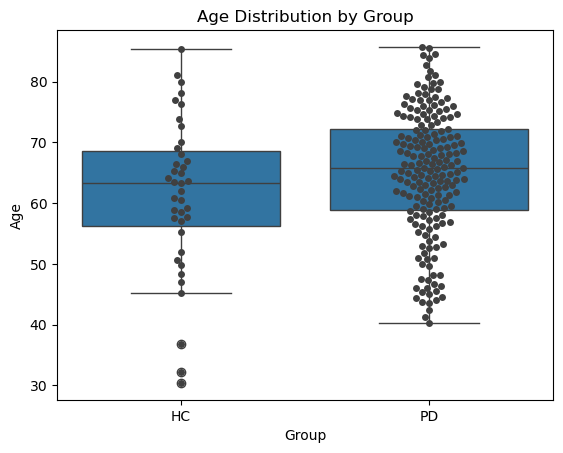

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine into one DataFrame
# Create DataFrame for plotting
df = pd.concat([
    pd.DataFrame({'Age': ages_hc, 'Group': 'HC'}),
    pd.DataFrame({'Age': ages_pd, 'Group': 'PD'})
])


sns.boxplot(data=df, x='Group', y='Age')
sns.swarmplot(data=df, x='Group', y='Age', color=".25")
plt.title("Age Distribution by Group")
plt.show()


In [19]:
import numpy as np
import pandas as pd

def compute_average_anat(df_Noconf_anat, df_Wconf_anat):
    """
    Compute average anatomical network metrics for 'no confidence' and 'with confidence' conditions.
    
    Parameters:
    -----------
    df_Noconf_anat : pandas.DataFrame
        DataFrame containing anatomical network metrics for 'no confidence' condition
    df_Wconf_anat : pandas.DataFrame
        DataFrame containing anatomical network metrics for 'with confidence' condition
        
    Returns:
    --------
    tuple of pandas.DataFrame
        Two DataFrames containing the averaged anatomical metrics for both conditions
    """
    # Define columns to process
    metric_cols = [
        'degree_(AnatomicalVar)', 
        'betweeness_(AnatomicalVar)', 
        'clusteringcoef_(AnatomicalVar)', 
        'eigenvec_(AnatomicalVar)', 
        'smallworldness(AnatomicalVar)',
        'avg_shortestPathLength(AnatomicalVar)'
    ]
    
    # Process a single dataframe
    def process_dataframe(df, rename_cols=False):
        # Filter the dataframe
        filtered_df = df[(df['acquisition'] == 'acq-RL') & 
                         (df['session'] == '1') &
                         (df['iteration'] == "iter_1")]
        
        # Dictionary to store stacked data
        stacked_data = {}
        
        # Process each metric column
        for col in metric_cols:
            stacked_data[col] = np.vstack(filtered_df[col].values)
        
        # Convert to DataFrame
        stacked_df = pd.DataFrame([stacked_data])
        
        # Create result dataframe with averaged values for matrix metrics
        matrix_cols = ['degree_(AnatomicalVar)', 'betweeness_(AnatomicalVar)', 
                      'clusteringcoef_(AnatomicalVar)', 'eigenvec_(AnatomicalVar)']
        
        result_df = pd.DataFrame({
            col: [np.mean(stacked_df.iloc[0][col], axis=0)] for col in matrix_cols
        })
        
        # Add scalar metrics directly
        result_df['smallworldness(AnatomicalVar)'] = stacked_df['smallworldness(AnatomicalVar)']
        result_df['avg_shortestPathLength(AnatomicalVar)'] = stacked_df['avg_shortestPathLength(AnatomicalVar)']
        
        # Rename columns if requested (for Wconf data)
        if rename_cols:
            rename_mapping = {col: col.replace('(AnatomicalVar)', '(AnatomicalVarW)') 
                             for col in result_df.columns}
            result_df = result_df.rename(columns=rename_mapping)
        
        return result_df
    
    # Process both dataframes
    avrg_Noconf_anat = process_dataframe(df_Noconf_anat, rename_cols=False)
    avrg_Wconf_anat = process_dataframe(df_Wconf_anat, rename_cols=True)
    
    return avrg_Noconf_anat, avrg_Wconf_anat


def compute_average_num(df_Noconf_num, df_Wconf_num):
    """
    Compute average numerical network metrics for 'no confidence' and 'with confidence' conditions.
    
    Parameters:
    -----------
    df_Noconf_num : pandas.DataFrame
        DataFrame containing numerical network metrics for 'no confidence' condition
    df_Wconf_num : pandas.DataFrame
        DataFrame containing numerical network metrics for 'with confidence' condition
        
    Returns:
    --------
    tuple of pandas.DataFrame
        Two DataFrames containing the averaged numerical metrics for both conditions
    """
    # Define columns to process
    metric_cols = [
        'degree_(numericalVar)', 
        'betweeness_(numericalVar)', 
        'clusteringcoef_(numericalVar)', 
        'eigenvec_(numericalVar)', 
        'smallworldness(numericalVar)',
        'avg_shortestPathLength(numericalVar)'
    ]
    
    # Process a single dataframe
    def process_dataframe(df, rename_cols=False):
        # Filter the dataframe
        filtered_df = df[(df['acquisition'] == 'acq-RL') & 
                         (df['session'] == '1')]
        
        # Dictionary to store stacked data
        stacked_data = {}
        
        # Process each metric column
        for col in metric_cols:
            stacked_data[col] = np.vstack(filtered_df[col].values)
        
        # Convert to DataFrame
        stacked_df = pd.DataFrame([stacked_data])
        
        # Create result dataframe with averaged values for matrix metrics
        matrix_cols = ['degree_(numericalVar)', 'betweeness_(numericalVar)', 
                      'clusteringcoef_(numericalVar)', 'eigenvec_(numericalVar)']
        
        result_df = pd.DataFrame({
            col: [np.mean(stacked_df.iloc[0][col], axis=0)] for col in matrix_cols
        })
        
        # Add scalar metrics directly
        result_df['smallworldness(numericalVar)'] = stacked_df['smallworldness(numericalVar)']
        result_df['avg_shortestPathLength(numericalVar)'] = stacked_df['avg_shortestPathLength(numericalVar)']
        
        # Rename columns if requested (for Wconf data)
        if rename_cols:
            rename_mapping = {col: col.replace('(numericalVar)', '(numericalVarW)') 
                             for col in result_df.columns}
            result_df = result_df.rename(columns=rename_mapping)
        
        return result_df
    
    # Process both dataframes
    avrg_Noconf_num = process_dataframe(df_Noconf_num, rename_cols=False)
    avrg_Wconf_num = process_dataframe(df_Wconf_num, rename_cols=True)
    
    return avrg_Noconf_num, avrg_Wconf_num


avrg_Noconf_num, avrg_Wconf_num = compute_average_num(df_Noconf_num, df_Wconf_num)
avrg_Noconf_anat, avrg_Wconf_anat = compute_average_anat(df_Noconf_anat, df_Wconf_anat)

avrghc_Noconf_num, avrghc_Wconf_num = compute_average_num(dfhc_Noconf_num, dfhc_Wconf_num)
avrghc_Noconf_anat, avrghc_Wconf_anat = compute_average_anat(dfhc_Noconf_anat, dfhc_Wconf_anat)

In [20]:
avrgavr_Noconf_num, avrgavr_Wconf_num = compute_average_num(dfavr_Noconf_num, dfavr_Wconf_num)
avrgavr_Noconf_anat, avrgavr_Wconf_anat = compute_average_anat(dfavr_Noconf_anat, dfavr_Wconf_anat)

avrgavrhc_Noconf_num, avrgavrhc_Wconf_num = compute_average_num(dfavrhc_Noconf_num, dfavrhc_Wconf_num)
avrgavrhc_Noconf_anat, avrgavrhc_Wconf_anat = compute_average_anat(dfavrhc_Noconf_anat, dfavrhc_Wconf_anat)

In [21]:
len(df_Noconf_anat.iloc[3]['degree_(AnatomicalVar)'][0])

100

In [22]:
# (df_Wconf_anat[(df_Wconf_anat['acquisition']=='acq-RL')&(df_Wconf_anat['session']=='1')]['clusteringcoef_(AnatomicalVar)'].iloc[0])

In [23]:
# dfavr_Noconf_anat[(dfavr_Noconf_anat['acquisition']=='acq-RL')&(dfavr_Noconf_anat['session']=='1')]['clusteringcoef_(AnatomicalVar)']

In [28]:
def change(arr,col):
    # Create the 'region' column with labels
    regions = [f"region_{i+1}" for i in range(len(arr))]

    # Create the DataFrame
    df = pd.DataFrame({'region': regions, f'{col}': arr})
    return df

In [29]:
###Plot avrg
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots

# List of metrics
metrics = ['degree', 'betweeness', 'eigenvec', 'clusteringcoef']

# Create subplots
fig = make_subplots(
    rows=len(metrics), 
    cols=1,  
    vertical_spacing=0.05
)

# Colors for different groups
colors = {
    'pd_anat_with_conf': 'rgb(34,139,34)',      # Dark Green
    'pd_anat_no_conf': 'rgb(60,179,60)',        # Light Green
    'hc_anat_with_conf': 'rgb(178,34,34)',           # Dark Red
    'hc_anat_no_conf': 'rgb(255,69,69)',             # Light Red
    'pd_num_with_conf': 'rgb(8,81,156)',        # Dark Blue
    'pd_num_no_conf': 'rgb(49,130,189)',        # Light Blue
    'hc_num_with_conf': 'rgb(148,0,211)',            # Dark Purple
    'hc_num_no_conf': 'rgb(186,85,211)'              # Light Purple
}

for i, metric in enumerate(metrics):
    # Patient group data processing
    # With confounds - Anatomical
    columns_to_extract_bet1 = [col for col in avrgavr_Wconf_anat.columns if metric in col]
    statics_bet1 = change(avrgavr_Wconf_anat[columns_to_extract_bet1].iloc[0][avrgavr_Wconf_anat[columns_to_extract_bet1].columns[0]], avrgavr_Wconf_anat[columns_to_extract_bet1].columns[0])
    bet_melted1 = statics_bet1.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # With confounds - Numerical
    columns_to_extract_with1 = [col for col in avrgavr_Wconf_num.columns if metric in col]
    statics_with1 = change(avrgavr_Wconf_num[columns_to_extract_with1].iloc[0][avrgavr_Wconf_num[columns_to_extract_with1].columns[0]], avrgavr_Wconf_num[columns_to_extract_with1].columns[0])
    with_melted1 = statics_with1.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # No confounds - Anatomical
    columns_to_extract_bet = [col for col in avrgavr_Noconf_anat.columns if metric in col]
    statics_bet = change(avrgavr_Noconf_anat[columns_to_extract_bet].iloc[0][avrgavr_Noconf_anat[columns_to_extract_bet].columns[0]], avrgavr_Noconf_anat[columns_to_extract_bet].columns[0])
    bet_melted = statics_bet.melt(id_vars=['region'], var_name='metric', value_name='value')
    # No confounds - Numerical
    columns_to_extract_with = [col for col in avrgavr_Noconf_num.columns if metric in col]
    statics_with = change(avrgavr_Noconf_num[columns_to_extract_with].iloc[0][avrgavr_Noconf_num[columns_to_extract_with].columns[0]], avrgavr_Noconf_num[columns_to_extract_with].columns[0])
    with_melted = statics_with.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # Healthy Control group data processing
    # With confounds - Anatomical
    columns_to_extract_hc_bet1 = [col for col in avrgavrhc_Wconf_anat.columns if metric in col]
    statics_hc_bet1 = change(avrgavrhc_Wconf_anat[columns_to_extract_hc_bet1].iloc[0][avrgavrhc_Wconf_anat[columns_to_extract_hc_bet1].columns[0]], avrgavrhc_Wconf_anat[columns_to_extract_hc_bet1].columns[0])
    hc_bet_melted1 = statics_hc_bet1.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # With confounds - Numerical
    columns_to_extract_hc_with1 = [col for col in avrgavrhc_Wconf_num.columns if metric in col]
    statics_hc_with1 = change(avrgavrhc_Wconf_num[columns_to_extract_hc_with1].iloc[0][avrgavrhc_Wconf_num[columns_to_extract_hc_with1].columns[0]], avrgavrhc_Wconf_num[columns_to_extract_hc_with1].columns[0])
    hc_with_melted1 = statics_hc_with1.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # No confounds - Anatomical
    columns_to_extract_hc_bet = [col for col in avrgavrhc_Noconf_anat.columns if metric in col]
    statics_hc_bet = change(avrgavrhc_Noconf_anat[columns_to_extract_hc_bet].iloc[0][avrgavrhc_Noconf_anat[columns_to_extract_hc_bet].columns[0]], avrgavrhc_Noconf_anat[columns_to_extract_hc_bet].columns[0])
    hc_bet_melted = statics_hc_bet.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # No confounds - Numerical
    columns_to_extract_hc_with = [col for col in avrgavrhc_Noconf_num.columns if metric in col]
    statics_hc_with = change(avrgavrhc_Noconf_num[columns_to_extract_hc_with].iloc[0][avrgavrhc_Noconf_num[columns_to_extract_hc_with].columns[0]], avrgavrhc_Noconf_num[columns_to_extract_hc_with].columns[0])
    hc_with_melted = statics_hc_with.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # Adjust x positions for better separation of groups
    x_positions = {
        'pd_anat_with_conf': 1,
        'hc_anat_with_conf':2,
        'pd_anat_no_conf': 3,
        'hc_anat_no_conf':4,
        'pd_num_with_conf': 5,
        'hc_num_with_conf':6,
        'pd_num_no_conf': 7,
        'hc_num_no_conf':8
        
    }
    
    # Patient group - Anatomical with confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['pd_anat_with_conf']] * len(bet_melted1),
            y=bet_melted1['value'],
            name="Pd Anat W/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(color=colors['pd_anat_with_conf']),
            width=0.5,
            showlegend=False,  # Show legend only for the first metric
            text=bet_melted1['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>pd Anat W/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # Patient group - Anatomical no confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['hc_anat_with_conf']] * len(hc_bet_melted1),
            y=hc_bet_melted1['value'],
            name="hc Anat W/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(color=colors['hc_anat_with_conf']),
            width=0.5,
            showlegend=False,
            text=bet_melted['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>hc Anat W/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # Patient group - Numerical with confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['pd_anat_no_conf']] * len(bet_melted),
            y=bet_melted['value'],
            name="pd Anat no/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(
                color=colors['pd_anat_no_conf'],
                outliercolor=colors['pd_anat_no_conf'],
                line=dict(outliercolor=colors['pd_anat_no_conf'], outlierwidth=2)
            ),
            width=0.5,
            showlegend=False,
            text=with_melted1['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>pd Anat no/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # Patient group - Numerical no confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['hc_anat_no_conf']] * len(hc_bet_melted),
            y=hc_bet_melted['value'],
            name="hc Anat No/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(
                color=colors['hc_anat_no_conf'],
                outliercolor=colors['hc_anat_no_conf'],
                line=dict(outliercolor=colors['hc_anat_no_conf'], outlierwidth=2)
            ),
            width=0.5,
            showlegend=False,
            text=with_melted['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>hc Anat No/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # HC group - Anatomical with confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['pd_num_with_conf']] * len(with_melted1),
            y=with_melted1['value'],
            name="pd Num W/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(color=colors['pd_num_with_conf']),
            width=0.5,
            showlegend=False,
            text=hc_bet_melted1['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>pd Num W/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # HC group - Anatomical no confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['hc_num_with_conf']] * len(hc_with_melted1),
            y=hc_with_melted1['value'],
            name="HC Num W/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(color=colors['hc_num_no_conf']),
            width=0.5,
            showlegend=False,
            text=hc_bet_melted['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>HC Num W/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # HC group - Numerical with confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['pd_num_no_conf']] * len(with_melted),
            y=with_melted['value'],
            name="pd Num No/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(
                color=colors['pd_num_no_conf'],
                outliercolor=colors['pd_num_no_conf'],
                line=dict(outliercolor=colors['pd_num_with_conf'], outlierwidth=2)
            ),
            width=0.5,
            showlegend=False,
            text=hc_with_melted1['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>pd Num No/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # HC group - Numerical no confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['hc_num_no_conf']] * len(hc_with_melted),
            y=hc_with_melted['value'],
            name="HC Num No/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(
                color=colors['hc_num_no_conf'],
                outliercolor=colors['hc_num_no_conf'],
                line=dict(outliercolor=colors['hc_num_no_conf'], outlierwidth=2)
            ),
            width=0.5,
            showlegend=False,
            text=hc_with_melted['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>HC Num No/Conf</extra>"
        ),
        row=i + 1, col=1
    )

# Update layout
fig.update_layout(
    title="Regional Variability (Local Graph Metric), Average across subjects and runs  - Pd vs. Healthy Controls",
    height=200 * len(metrics),  # Increased height to accommodate more data
    width=1200,  # Increased width
    showlegend=False,
    # legend_title="Groups",
    # legend=dict(
    #     orientation="h",
    #     yanchor="bottom",
    #     y=-0.15,
    #     xanchor="center",
    #     x=0.5
    # ),
    margin=dict(l=50, r=50, t=80, b=150),  # Increased bottom margin for legend
    template='plotly'
)

# Update y-axes with scientific notation format
for row in range(1, len(metrics) + 1):
    fig.update_yaxes(tickformat=".1e", row=row, col=1)

# Create custom x-axis ticks
x_ticks = list(x_positions.values())
x_tick_labels = [
    "pd sampleAvrg W/Conf", "hc sampleAvrg W/Conf", 
    "pd sampleAvrg No/Conf", "hc sampleAvrg No/Conf",
    "pd NumAvrg W/Conf", "hc NumAvrg W/Conf", 
    "pd NumAvrg No/Conf", "hc NumAvrg No/Conf"
]

# Remove x-axis tick labels for all but the last subplot
for row in range(1, len(metrics)):
    fig.update_xaxes(showticklabels=False, row=row, col=1)

# Add x-axis labels only to the bottom subplot
fig.update_xaxes(
    tickvals=x_ticks,
    ticktext=x_tick_labels,
    tickangle=45,
    row=len(metrics),
    col=1
)

# Add annotations for metric names on the left side
metric_labels = ["Degree Centrality", "Betweeness Centrality", "Eigen vector Centrality", "Clustering coefficient"]
y_positions = [1.038,0.79,0.5,0.23]  # Adjusted for 4 metrics

for i, (label, y_pos) in enumerate(zip(metric_labels, y_positions)):
    fig.add_annotation(
        text=label,
        xref="paper", yref="paper",
        x=0.0, y=y_pos,
        showarrow=False,
        xanchor="left"
    )

# Save figure
fig.write_image("LocalMetricPlot_Patients_vs_HC.png", scale=3)
fig.write_html("LocalMetricPlot_Patients_vs_HC.html")

# Show figure
fig.show()

In [ ]:
####Plot std
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots

# List of metrics
metrics = ['degree', 'betweeness', 'eigenvec', 'clusteringcoef']

# Create subplots
fig = make_subplots(
    rows=len(metrics), 
    cols=1,  
    vertical_spacing=0.05
)

# Colors for different groups
colors = {
    'pd_anat_with_conf': 'rgb(34,139,34)',      # Dark Green
    'pd_anat_no_conf': 'rgb(60,179,60)',        # Light Green
    'hc_anat_with_conf': 'rgb(178,34,34)',           # Dark Red
    'hc_anat_no_conf': 'rgb(255,69,69)',             # Light Red
    'pd_num_with_conf': 'rgb(8,81,156)',        # Dark Blue
    'pd_num_no_conf': 'rgb(49,130,189)',        # Light Blue
    'hc_num_with_conf': 'rgb(148,0,211)',            # Dark Purple
    'hc_num_no_conf': 'rgb(186,85,211)'              # Light Purple
}

for i, metric in enumerate(metrics):
    # Patient group data processing
    # With confounds - Anatomical
    columns_to_extract_bet1 = [col for col in avrg_Wconf_anat.columns if metric in col]
    statics_bet1 = change(avrg_Wconf_anat[columns_to_extract_bet1].iloc[0][avrg_Wconf_anat[columns_to_extract_bet1].columns[0]], avrg_Wconf_anat[columns_to_extract_bet1].columns[0])
    bet_melted1 = statics_bet1.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # With confounds - Numerical
    columns_to_extract_with1 = [col for col in avrg_Wconf_num.columns if metric in col]
    statics_with1 = change(avrg_Wconf_num[columns_to_extract_with1].iloc[0][avrg_Wconf_num[columns_to_extract_with1].columns[0]], avrg_Wconf_num[columns_to_extract_with1].columns[0])
    with_melted1 = statics_with1.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # No confounds - Anatomical
    columns_to_extract_bet = [col for col in avrg_Noconf_anat.columns if metric in col]
    statics_bet = change(avrg_Noconf_anat[columns_to_extract_bet].iloc[0][avrg_Noconf_anat[columns_to_extract_bet].columns[0]], avrg_Noconf_anat[columns_to_extract_bet].columns[0])
    bet_melted = statics_bet.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # No confounds - Numerical
    columns_to_extract_with = [col for col in avrg_Noconf_num.columns if metric in col]
    statics_with = change(avrg_Noconf_num[columns_to_extract_with].iloc[0][avrg_Noconf_num[columns_to_extract_with].columns[0]], avrg_Noconf_num[columns_to_extract_with].columns[0])
    with_melted = statics_with.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # Healthy Control group data processing
    # With confounds - Anatomical
    columns_to_extract_hc_bet1 = [col for col in avrghc_Wconf_anat.columns if metric in col]
    statics_hc_bet1 = change(avrghc_Wconf_anat[columns_to_extract_hc_bet1].iloc[0][avrghc_Wconf_anat[columns_to_extract_hc_bet1].columns[0]], avrghc_Wconf_anat[columns_to_extract_hc_bet1].columns[0])
    hc_bet_melted1 = statics_hc_bet1.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # With confounds - Numerical
    columns_to_extract_hc_with1 = [col for col in avrghc_Wconf_num.columns if metric in col]
    statics_hc_with1 = change(avrghc_Wconf_num[columns_to_extract_hc_with1].iloc[0][avrghc_Wconf_num[columns_to_extract_hc_with1].columns[0]], avrghc_Wconf_num[columns_to_extract_hc_with1].columns[0])
    hc_with_melted1 = statics_hc_with1.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # No confounds - Anatomical
    columns_to_extract_hc_bet = [col for col in avrghc_Noconf_anat.columns if metric in col]
    statics_hc_bet = change(avrghc_Noconf_anat[columns_to_extract_hc_bet].iloc[0][avrghc_Noconf_anat[columns_to_extract_hc_bet].columns[0]], avrghc_Noconf_anat[columns_to_extract_hc_bet].columns[0])
    hc_bet_melted = statics_hc_bet.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # No confounds - Numerical
    columns_to_extract_hc_with = [col for col in avrghc_Noconf_num.columns if metric in col]
    statics_hc_with = change(avrghc_Noconf_num[columns_to_extract_hc_with].iloc[0][avrghc_Noconf_num[columns_to_extract_hc_with].columns[0]], avrghc_Noconf_num[columns_to_extract_hc_with].columns[0])
    hc_with_melted = statics_hc_with.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # Adjust x positions for better separation of groups
    x_positions = {
        'pd_anat_with_conf': 1,
        'hc_anat_with_conf':2,
        'pd_anat_no_conf': 3,
        'hc_anat_no_conf':4,
        'pd_num_with_conf': 5,
        'hc_num_with_conf':6,
        'pd_num_no_conf': 7,
        'hc_num_no_conf':8
        
    }
    
    # Patient group - Anatomical with confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['pd_anat_with_conf']] * len(bet_melted1),
            y=bet_melted1['value'],
            name="Pd Anat W/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(color=colors['pd_anat_with_conf']),
            width=0.5,
            showlegend=False,  # Show legend only for the first metric
            text=bet_melted1['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>pd Anat W/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # Patient group - Anatomical no confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['hc_anat_with_conf']] * len(hc_bet_melted1),
            y=hc_bet_melted1['value'],
            name="hc Anat W/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(color=colors['hc_anat_with_conf']),
            width=0.5,
            showlegend=False,
            text=bet_melted['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>hc Anat W/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # Patient group - Numerical with confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['pd_anat_no_conf']] * len(bet_melted),
            y=bet_melted['value'],
            name="pd Anat no/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(
                color=colors['pd_anat_no_conf'],
                outliercolor=colors['pd_anat_no_conf'],
                line=dict(outliercolor=colors['pd_anat_no_conf'], outlierwidth=2)
            ),
            width=0.5,
            showlegend=False,
            text=with_melted1['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>pd Anat no/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # Patient group - Numerical no confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['hc_anat_no_conf']] * len(hc_bet_melted),
            y=hc_bet_melted['value'],
            name="hc Anat No/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(
                color=colors['hc_anat_no_conf'],
                outliercolor=colors['hc_anat_no_conf'],
                line=dict(outliercolor=colors['hc_anat_no_conf'], outlierwidth=2)
            ),
            width=0.5,
            showlegend=False,
            text=with_melted['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>hc Anat No/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # HC group - Anatomical with confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['pd_num_with_conf']] * len(with_melted1),
            y=with_melted1['value'],
            name="pd Num W/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(color=colors['pd_num_with_conf']),
            width=0.5,
            showlegend=False,
            text=hc_bet_melted1['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>pd Num W/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # HC group - Anatomical no confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['hc_num_with_conf']] * len(hc_with_melted1),
            y=hc_with_melted1['value'],
            name="HC Num W/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(color=colors['hc_num_no_conf']),
            width=0.5,
            showlegend=False,
            text=hc_bet_melted['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>HC Num W/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # HC group - Numerical with confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['pd_num_no_conf']] * len(with_melted),
            y=with_melted['value'],
            name="pd Num No/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(
                color=colors['pd_num_no_conf'],
                outliercolor=colors['pd_num_no_conf'],
                line=dict(outliercolor=colors['pd_num_with_conf'], outlierwidth=2)
            ),
            width=0.5,
            showlegend=False,
            text=hc_with_melted1['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>pd Num No/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # HC group - Numerical no confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['hc_num_no_conf']] * len(hc_with_melted),
            y=hc_with_melted['value'],
            name="HC Num No/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(
                color=colors['hc_num_no_conf'],
                outliercolor=colors['hc_num_no_conf'],
                line=dict(outliercolor=colors['hc_num_no_conf'], outlierwidth=2)
            ),
            width=0.5,
            showlegend=False,
            text=hc_with_melted['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>HC Num No/Conf</extra>"
        ),
        row=i + 1, col=1
    )

# Update layout
fig.update_layout(
    title="Regional Variability (Local Graph Metric), standard deviation across subjects and runs  - Pd vs. Healthy Controls",
    height=200 * len(metrics),  # Increased height to accommodate more data
    width=1200,  # Increased width
    showlegend=False,
    # legend_title="Groups",
    # legend=dict(
    #     orientation="h",
    #     yanchor="bottom",
    #     y=-0.15,
    #     xanchor="center",
    #     x=0.5
    # ),
    margin=dict(l=50, r=50, t=80, b=150),  # Increased bottom margin for legend
    template='plotly'
)

# Update y-axes with scientific notation format
for row in range(1, len(metrics) + 1):
    fig.update_yaxes(tickformat=".1e", row=row, col=1)

# Create custom x-axis ticks
x_ticks = list(x_positions.values())
x_tick_labels = [
    "pd sampleVar W/Conf", "hc sampleVar W/Conf", 
    "pd sampleVar No/Conf", "hc sampleVar No/Conf",
    "pd NumVar W/Conf", "hc NumVar W/Conf", 
    "pd NumVar No/Conf", "hc NumVar No/Conf"
]

# Remove x-axis tick labels for all but the last subplot
for row in range(1, len(metrics)):
    fig.update_xaxes(showticklabels=False, row=row, col=1)

# Add x-axis labels only to the bottom subplot
fig.update_xaxes(
    tickvals=x_ticks,
    ticktext=x_tick_labels,
    tickangle=45,
    row=len(metrics),
    col=1
)

# Add annotations for metric names on the left side
metric_labels = ["Degree Centrality", "Betweeness Centrality", "Eigen vector Centrality", "Clustering coefficient"]
y_positions = [1.038,0.79,0.5,0.23]  # Adjusted for 4 metrics

for i, (label, y_pos) in enumerate(zip(metric_labels, y_positions)):
    fig.add_annotation(
        text=label,
        xref="paper", yref="paper",
        x=0.0, y=y_pos,
        showarrow=False,
        xanchor="left"
    )

# Save figure
fig.write_image("LocalMetricPlot_Patients_vs_HC.png", scale=3)
fig.write_html("LocalMetricPlot_Patients_vs_HC.html")

# Show figure
fig.show()

In [25]:
#Just for numerical
####Plot std
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots

# List of metrics
metrics = ['degree', 'betweeness', 'eigenvec', 'clusteringcoef']

# Create subplots
fig = make_subplots(
    rows=len(metrics), 
    cols=1,  
    vertical_spacing=0.05
)

# Colors for different groups
colors = {

    'pd_num_with_conf': 'rgb(8,81,156)',        # Dark Blue
    'pd_num_no_conf': 'rgb(49,130,189)',        # Light Blue
    'hc_num_with_conf': 'rgb(148,0,211)',            # Dark Purple
    'hc_num_no_conf': 'rgb(186,85,211)'              # Light Purple
}

for i, metric in enumerate(metrics):
    # Patient group data processing

    # With confounds - Numerical
    columns_to_extract_with1 = [col for col in avrg_Wconf_num.columns if metric in col]
    statics_with1 = change(avrg_Wconf_num[columns_to_extract_with1].iloc[0][avrg_Wconf_num[columns_to_extract_with1].columns[0]], avrg_Wconf_num[columns_to_extract_with1].columns[0])
    with_melted1 = statics_with1.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # No confounds - Numerical
    columns_to_extract_with = [col for col in avrg_Noconf_num.columns if metric in col]
    statics_with = change(avrg_Noconf_num[columns_to_extract_with].iloc[0][avrg_Noconf_num[columns_to_extract_with].columns[0]], avrg_Noconf_num[columns_to_extract_with].columns[0])
    with_melted = statics_with.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # Healthy Control group data processing

    # With confounds - Numerical
    columns_to_extract_hc_with1 = [col for col in avrghc_Wconf_num.columns if metric in col]
    statics_hc_with1 = change(avrghc_Wconf_num[columns_to_extract_hc_with1].iloc[0][avrghc_Wconf_num[columns_to_extract_hc_with1].columns[0]], avrghc_Wconf_num[columns_to_extract_hc_with1].columns[0])
    hc_with_melted1 = statics_hc_with1.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # No confounds - Numerical
    columns_to_extract_hc_with = [col for col in avrghc_Noconf_num.columns if metric in col]
    statics_hc_with = change(avrghc_Noconf_num[columns_to_extract_hc_with].iloc[0][avrghc_Noconf_num[columns_to_extract_hc_with].columns[0]], avrghc_Noconf_num[columns_to_extract_hc_with].columns[0])
    hc_with_melted = statics_hc_with.melt(id_vars=['region'], var_name='metric', value_name='value')
    
    # Adjust x positions for better separation of groups
    x_positions = {

        'pd_num_with_conf': 1,
        'hc_num_with_conf':2,
        'pd_num_no_conf': 3,
        'hc_num_no_conf':4
        
    }
    
    # HC group - Anatomical with confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['pd_num_with_conf']] * len(with_melted1),
            y=with_melted1['value'],
            name="pd Num W/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(color=colors['pd_num_with_conf']),
            width=0.5,
            showlegend=False,
            text=with_melted1['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>pd Num W/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # HC group - Anatomical no confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['hc_num_with_conf']] * len(hc_with_melted1),
            y=hc_with_melted1['value'],
            name="HC Num W/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(color=colors['hc_num_no_conf']),
            width=0.5,
            showlegend=False,
            text=hc_with_melted1['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>HC Num W/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # HC group - Numerical with confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['pd_num_no_conf']] * len(with_melted),
            y=with_melted['value'],
            name="pd Num No/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(
                color=colors['pd_num_no_conf'],
                outliercolor=colors['pd_num_no_conf'],
                line=dict(outliercolor=colors['pd_num_with_conf'], outlierwidth=2)
            ),
            width=0.5,
            showlegend=False,
            text=with_melted['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>pd Num No/Conf</extra>"
        ),
        row=i + 1, col=1
    )
    
    # HC group - Numerical no confounds
    fig.add_trace(
        go.Box(
            x=[x_positions['hc_num_no_conf']] * len(hc_with_melted),
            y=hc_with_melted['value'],
            name="HC Num No/Conf",
            boxpoints='suspectedoutliers',
            jitter=0.3,
            pointpos=0,
            marker=dict(
                color=colors['hc_num_no_conf'],
                outliercolor=colors['hc_num_no_conf'],
                line=dict(outliercolor=colors['hc_num_no_conf'], outlierwidth=2)
            ),
            width=0.5,
            showlegend=False,
            text=hc_with_melted['region'],
            hovertemplate="<b>Region:</b> %{text}<br><b>Value:</b> %{y}<br><extra>HC Num No/Conf</extra>"
        ),
        row=i + 1, col=1
    )

# Update layout
fig.update_layout(
    title="Regional Variability (Local Graph Metric), standard deviation across  MCA runs  - Pd vs. Healthy Controls",
    height=200 * len(metrics),  # Increased height to accommodate more data
    width=1200,  # Increased width
    showlegend=False,
    # legend_title="Groups",
    # legend=dict(
    #     orientation="h",
    #     yanchor="bottom",
    #     y=-0.15,
    #     xanchor="center",
    #     x=0.5
    # ),
    margin=dict(l=50, r=50, t=80, b=150),  # Increased bottom margin for legend
    template='plotly'
)

# Update y-axes with scientific notation format
for row in range(1, len(metrics) + 1):
    fig.update_yaxes(tickformat=".1e", row=row, col=1)

# Create custom x-axis ticks
x_ticks = list(x_positions.values())
x_tick_labels = [
    "pd NumVar W/Conf", "hc NumVar W/Conf", 
    "pd NumVar No/Conf", "hc NumVar No/Conf"
]

# Remove x-axis tick labels for all but the last subplot
for row in range(1, len(metrics)):
    fig.update_xaxes(showticklabels=False, row=row, col=1)

# Add x-axis labels only to the bottom subplot
fig.update_xaxes(
    tickvals=x_ticks,
    ticktext=x_tick_labels,
    tickangle=45,
    row=len(metrics),
    col=1
)

# Add annotations for metric names on the left side
metric_labels = ["Degree Centrality", "Betweeness Centrality", "Eigen vector Centrality", "Clustering coefficient"]
y_positions = [1.038,0.79,0.5,0.23]  # Adjusted for 4 metrics

for i, (label, y_pos) in enumerate(zip(metric_labels, y_positions)):
    fig.add_annotation(
        text=label,
        xref="paper", yref="paper",
        x=0.0, y=y_pos,
        showarrow=False,
        xanchor="left"
    )

# Save figure
fig.write_image("LocalMetricPlot_Patients_vs_HC.png", scale=3)
fig.write_html("LocalMetricPlot_Patients_vs_HC.html")

# Show figure
fig.show()

In [21]:
def stdofavrg_with(Results_table) :
   # Initialize DataFrames
    stdofavr_WithinSubject = pd.DataFrame()  # Std over averaged across runs
    avr_WithinSubject = pd.DataFrame()  # Average across runs

    # Get unique subjects from the Results_table
    subjects =np.unique(Results_table['subject'])


    i=0
    # Loop over each subject
    for subj in subjects: 
        # Filter the DataFrame for each subject and drop unnecessary columns once
        filtered_df = Results_table[Results_table['subject'] == subj]
        
        # Loop over each unique session and acquisition combination
        for session in np.unique(filtered_df['session']):
            for acquisition in np.unique(filtered_df['acquisition']):
                if acquisition not in ['acq-RLsplit1', 'acq-LRsplit1']:
                    avr_degree_centrality, avr_betweeness_centrality, avr_eigen_centrality, avr_clustering_coef = [], [], [], []
                    std_degree_centrality, std_betweeness_centrality, std_eigen_centrality, std_clustering_coef = [], [], [], []
                    smallworldness, avg_shortestPathLength = [], []                # Loop over each repetition to generate correlation matrices
                    for rep in range(1, 11):
                        # Filter for each specific repetition
                        filtered_rows = filtered_df[
                            (filtered_df['session'] == session) &
                            (filtered_df['acquisition'] == acquisition) &
                            (filtered_df['repetition'] == f'rep-{rep}')
                        ]
                        if filtered_rows.empty:
                            continue
                        degree_values = list(filtered_rows['degree_centralities'].values[0].values())
                        betweeness_values = list(filtered_rows['betweenness_centralities'].values[0].values())
                        eigen_values = list(filtered_rows['eigenvector_centralities'].values[0].values())
                        clustering_values = list(filtered_rows['clustering_coefficients'].values[0].values())
                        # Append averages for each iteration
                        avr_degree_centrality.append(np.mean(degree_values))
                        avr_betweeness_centrality.append(np.mean(betweeness_values))
                        avr_eigen_centrality.append(np.mean(eigen_values))
                        avr_clustering_coef.append(np.mean(clustering_values))
                        # Append standard deviations for each
                        std_degree_centrality.append(np.std(degree_values))
                        std_betweeness_centrality.append(np.std(betweeness_values))
                        std_eigen_centrality.append(np.std(eigen_values))
                        std_clustering_coef.append(np.std(clustering_values))
                        smallworldness.append(filtered_rows['small_worldness'])
                        avg_shortestPathLength.append(filtered_rows['avg_shortest_path_length'])
                                # Calculate and store statistics for each subject after all iterations
                    if not avr_degree_centrality:
                        continue
                    stdofavr_WithinSubject.loc[i, 'degree_(numericalVar)'] = np.std(avr_degree_centrality)
                    stdofavr_WithinSubject.loc[i, 'betweeness_(numericalVar)'] = np.std(avr_betweeness_centrality)
                    stdofavr_WithinSubject.loc[i, 'clusteringcoef_(numericalVar)'] = np.std(avr_clustering_coef)
                    stdofavr_WithinSubject.loc[i, 'eigenvec_(numericalVar)'] = np.std(avr_eigen_centrality)
                    stdofavr_WithinSubject.loc[i, 'smallworldness(numericalVar)'] = np.std(smallworldness)
                    stdofavr_WithinSubject.loc[i, 'avg_shortestPathLength(numericalVar)'] = np.std(avg_shortestPathLength)

                    stdofavr_WithinSubject.loc[i, 'subject']=subj
                    stdofavr_WithinSubject.loc[i, 'session']= session
                    stdofavr_WithinSubject.loc[i, 'acquisition']= acquisition
                    
                    avr_WithinSubject.loc[i, 'degree_(numericalVar)'] = np.mean(avr_degree_centrality)
                    avr_WithinSubject.loc[i, 'betweeness_(numericalVar)'] = np.mean(avr_betweeness_centrality)
                    avr_WithinSubject.loc[i, 'clusteringcoef_(numericalVar)'] = np.mean(avr_clustering_coef)
                    avr_WithinSubject.loc[i, 'eigenvec_(numericalVar)'] = np.mean(avr_eigen_centrality)
                    avr_WithinSubject.loc[i, 'smallworldness(numericalVar)'] = np.mean(smallworldness)
                    avr_WithinSubject.loc[i, 'avg_shortestPathLength(numericalVar)'] = np.mean(avg_shortestPathLength)
                    avr_WithinSubject.loc[i, 'subject']=subj
                    avr_WithinSubject.loc[i, 'session']= session
                    avr_WithinSubject.loc[i, 'acquisition']= acquisition
                    
                    i=i+1
    stdofavr_WithinSubject=stdofavr_WithinSubject.dropna()
    avr_WithinSubject=avr_WithinSubject.dropna()
    return stdofavr_WithinSubject

In [22]:
def stdofavrg_bet(Results_table):
    # Initialize DataFrames for between-subject analysis
    stdofavr_BetweenSubject = pd.DataFrame()  # Std over averaged across subjects
    avr_BetweenSubject = pd.DataFrame()  # Average across subjects


    # Get unique subjects from the Results_table
    subjects = np.unique(Results_table['subject'])

    # Initialize a list to hold data entries for the final DataFrame
    subject_data = []
    i=0
    # Loop over each repetition
    for rep in range(1, 11):
        # Filter DataFrame for the current repetition and drop unnecessary columns
        filtered_df = Results_table[Results_table['repetition'] == f'rep-{rep}']

        # Loop over each session
        for session in np.unique(filtered_df['session']):
            # Loop over each acquisition type
            for acquisition in np.unique(filtered_df['acquisition']):
                # Skip unwanted acquisitions
                if acquisition in ['acq-RLsplit1', 'acq-LRsplit1']:
                    continue
                
                # Initialize lists to store results for each iteration across subjects
                acrosSub_avr_degree_centrality = []
                acrosSub_avr_betweeness_centrality = []
                acrosSub_avr_eigen_centrality = []
                acrosSub_avr_clustering_coef = []
                acrosSub_std_degree_centrality = []
                acrosSub_std_betweeness_centrality = []
                acrosSub_std_eigen_centrality = []
                acrosSub_std_clustering_coef = []
                acrosSub_smallworld=[]
                acrosSub_avrgShortestPathLength=[]
                
                # Loop over each subject
                for subj in subjects:
                    # Filter rows for the specific subject, session, and acquisition
                    filtered_rows = filtered_df[
                        (filtered_df['session'] == session) &
                        (filtered_df['acquisition'] == acquisition) &
                        (filtered_df['subject'] == subj)
                    ]

                    if filtered_rows.empty:
                        continue
                    degree_values = list(filtered_rows['degree_centralities'].values[0].values())
                    betweeness_values = list(filtered_rows['betweenness_centralities'].values[0].values())
                    eigen_values = list(filtered_rows['eigenvector_centralities'].values[0].values())
                    clustering_values = list(filtered_rows['clustering_coefficients'].values[0].values())

                    # Append averages for each subject
                    acrosSub_avr_degree_centrality.append(np.mean(degree_values))
                    acrosSub_avr_betweeness_centrality.append(np.mean(betweeness_values))
                    acrosSub_avr_eigen_centrality.append(np.mean(eigen_values))
                    acrosSub_avr_clustering_coef.append(np.mean(clustering_values))

                    # Append standard deviations for each subject
                    acrosSub_std_degree_centrality.append(np.std(degree_values))
                    acrosSub_std_betweeness_centrality.append(np.std(betweeness_values))
                    acrosSub_std_eigen_centrality.append(np.std(eigen_values))
                    acrosSub_std_clustering_coef.append(np.std(clustering_values))
                    acrosSub_smallworld.append(filtered_rows['small_worldness'])
                    acrosSub_avrgShortestPathLength.append(filtered_rows['avg_shortest_path_length'])
                # Calculate and store statistics for each iteration across subjects
                if len(acrosSub_avr_degree_centrality)<2:
                    continue
                # if rep==8 and session=='1' and acquisition=='acq-RL':
                #      print(np.std(acrosSub_avr_degree_centrality))
                #      print(acrosSub_avr_degree_centrality)
                #      print(len(acrosSub_avr_degree_centrality))

                stdofavr_BetweenSubject.loc[i, 'degree_(AnatomicalVar)'] = np.std(acrosSub_avr_degree_centrality)
                stdofavr_BetweenSubject.loc[i, 'betweeness_(AnatomicalVar)'] = np.std(acrosSub_avr_betweeness_centrality)
                stdofavr_BetweenSubject.loc[i, 'clusteringcoef_(AnatomicalVar)'] = np.std(acrosSub_avr_clustering_coef)
                stdofavr_BetweenSubject.loc[i, 'eigenvec_(AnatomicalVar)'] = np.std(acrosSub_avr_eigen_centrality)
                stdofavr_BetweenSubject.loc[i, 'smallworldness_(AnatomicalVar)'] = np.std(acrosSub_smallworld)
                stdofavr_BetweenSubject.loc[i, 'avg_shortestPathLength_(AnatomicalVar)'] = np.std(acrosSub_avrgShortestPathLength)
            
                stdofavr_BetweenSubject.loc[i, 'iter']=f'iter_{rep}'
                stdofavr_BetweenSubject.loc[i, 'session']= session
                stdofavr_BetweenSubject.loc[i, 'acquisition']= acquisition

                avr_BetweenSubject.loc[i, 'degree_(AnatomicalVar)'] = np.mean(acrosSub_avr_degree_centrality)
                avr_BetweenSubject.loc[i, 'betweeness_(AnatomicalVar)'] = np.mean(acrosSub_avr_betweeness_centrality)
                avr_BetweenSubject.loc[i, 'clusteringcoef_(AnatomicalVar)'] = np.mean(acrosSub_avr_clustering_coef)
                avr_BetweenSubject.loc[i, 'eigenvec_(AnatomicalVar)'] = np.mean(acrosSub_avr_eigen_centrality)
                avr_BetweenSubject.loc[i, 'smallworldness_(AnatomicalVar)'] = np.mean(acrosSub_smallworld)
                avr_BetweenSubject.loc[i, 'avg_shortestPathLength_(AnatomicalVar)'] = np.mean(acrosSub_avrgShortestPathLength)

                avr_BetweenSubject.loc[i, 'iter']=f'iter_{rep}'
                avr_BetweenSubject.loc[i, 'session']= session
                avr_BetweenSubject.loc[i, 'acquisition']= acquisition

                i=i+1
    stdofavr_BetweenSubject=stdofavr_BetweenSubject.dropna()
    avr_BetweenSubject=avr_BetweenSubject.dropna()
    return stdofavr_BetweenSubject

In [23]:
df_stdofavr_WithinSubjectN= stdofavrg_with(dfN)
df_stdofavr_BetweenSubjectN=stdofavrg_bet(dfN)
df_stdofavr_WithinSubject= stdofavrg_with(dfW)
df_stdofavr_BetweenSubject=stdofavrg_bet(dfW)

In [24]:
# # Filter the DataFrame
# s = dfN[(dfN['repetition'] == 'rep-8') & 
#         (dfN['acquisition'] == 'acq-RL') & 
#         # (dfN['subject']=='sub-100842')&
#         (dfN['session'] == '1')]['degree_centralities']

# # Compute mean of each dictionary row
# row_means = s.apply(lambda d: pd.Series(d).mean())

# # Compute standard deviation of those means
# overall_std = row_means.std()

# print("Standard deviation of row means:", overall_std)
# row_means

In [25]:

df_stdofavr_WithinSubjecthc=pd.read_pickle('/home/ubuntu/Desktop/Thesis/overlap/allbatches/NumGmetricstd_WConf_batchhc.pkl')
df_stdofavr_BetweenSubjecthc=pd.read_pickle('/home/ubuntu/Desktop/Thesis/overlap/allbatches/AnatGmetricstd_WConf_batchhc.pkl')
df_stdofavr_WithinSubjecthcN=pd.read_pickle('/home/ubuntu/Desktop/Thesis/overlap/allbatches/NumGmetricstd_NoConf_batchhc.pkl')
df_stdofavr_BetweenSubjecthcN=pd.read_pickle('/home/ubuntu/Desktop/Thesis/overlap/allbatches/AnatGmetricstd_NoConf_batchhc.pkl')
# df_stdofavr_WithinSubjectN[df_stdofavr_WithinSubjectN['acquisition']=='acq-ep2d']


In [26]:
acq='acq-RL'
stdofavr_WithinSubject1 = df_stdofavr_WithinSubjectN[
    (df_stdofavr_WithinSubjectN['session'] == '1') & 
    (df_stdofavr_WithinSubjectN['acquisition'] == acq)
].drop(columns=['session', 'acquisition','smallworldness(numericalVar)','avg_shortestPathLength(numericalVar)'])

# Rename specific columns
stdofavr_WithinSubject1 = stdofavr_WithinSubject1.rename(columns={'degree_(numericalVar)': 'degree_(numericalVar1)', 'betweeness_(numericalVar)': 'betweeness_(numericalVar1)' , 'clusteringcoef_(numericalVar)':'clusteringcoef_(numericalVar1)'   , 'eigenvec_(numericalVar)':'eigenvec_(numericalVar1)'  })

stdofavr_BetweenSubject1 = df_stdofavr_BetweenSubjectN[
    (df_stdofavr_BetweenSubjectN['session'] == '1') & 
    (df_stdofavr_BetweenSubjectN['acquisition'] == acq)
].drop(columns=['session', 'acquisition','smallworldness_(AnatomicalVar)','avg_shortestPathLength_(AnatomicalVar)'])

stdofavr_BetweenSubject1 = stdofavr_BetweenSubject1.rename(columns={'degree_(AnatomicalVar)': 'degree_(AnatomicalVar1)', 'betweeness_(AnatomicalVar)': 'betweeness_(AnatomicalVar1)' , 'clusteringcoef_(AnatomicalVar)':'clusteringcoef_(AnatomicalVar1)'   , 'eigenvec_(AnatomicalVar)':'eigenvec_(AnatomicalVar1)'  })


In [27]:
stdofavr_WithinSubjectWconf = df_stdofavr_WithinSubject[
    (df_stdofavr_WithinSubject['session'] == '1') & 
    (df_stdofavr_WithinSubject['acquisition'] == acq)
].drop(columns=['session', 'acquisition','smallworldness(numericalVar)','avg_shortestPathLength(numericalVar)'])
stdofavr_BetweenSubjectWconf = df_stdofavr_BetweenSubject[
    (df_stdofavr_BetweenSubject['session'] == '1') & 
    (df_stdofavr_BetweenSubject['acquisition'] == acq)
].drop(columns=['session', 'acquisition','smallworldness_(AnatomicalVar)','avg_shortestPathLength_(AnatomicalVar)'])

stdofavr_WithinSubjectWconf = stdofavr_WithinSubjectWconf.rename(columns={'degree_(numericalVar)': 'degree_(numericalVarW)', 'betweeness_(numericalVar)': 'betweeness_(numericalVarW)' , 'clusteringcoef_(numericalVar)':'clusteringcoef_(numericalVarW)'   , 'eigenvec_(numericalVar)':'eigenvec_(numericalVarW)'  })
stdofavr_BetweenSubjectWconf = stdofavr_BetweenSubjectWconf.rename(columns={'degree_(AnatomicalVar)': 'degree_(AnatomicalVarW)', 'betweeness_(AnatomicalVar)': 'betweeness_(AnatomicalVarW)' , 'clusteringcoef_(AnatomicalVar)':'clusteringcoef_(AnatomicalVarW)'   , 'eigenvec_(AnatomicalVar)':'eigenvec_(AnatomicalVarW)'  })
# ####################3
stdofavr_WithinSubjectWconfhc = df_stdofavr_WithinSubjecthc[
    (df_stdofavr_WithinSubjecthc['session'] == '1') & 
    (df_stdofavr_WithinSubjecthc['acquisition'] == acq)
].drop(columns=['session', 'acquisition','smallworldness(numericalVar)','avg_shortestPathLength(numericalVar)'])
stdofavr_BetweenSubjectWconfhc = df_stdofavr_BetweenSubjecthc[
    (df_stdofavr_BetweenSubjecthc['session'] == '1') & 
    (df_stdofavr_BetweenSubjecthc['acquisition'] == acq)
].drop(columns=['session', 'acquisition','smallworldness_(AnatomicalVar)','avg_shortestPathLength_(AnatomicalVar)'])

stdofavr_WithinSubjectWconfhc= stdofavr_WithinSubjectWconfhc.rename(columns={'degree_(numericalVar)': 'degree_(numericalVarWhc)', 'betweeness_(numericalVar)': 'betweeness_(numericalVarWhc)' , 'clusteringcoef_(numericalVar)':'clusteringcoef_(numericalVarWhc)'   , 'eigenvec_(numericalVar)':'eigenvec_(numericalVarWhc)'  })
stdofavr_BetweenSubjectWconfhc = stdofavr_BetweenSubjectWconfhc.rename(columns={'degree_(AnatomicalVar)': 'degree_(AnatomicalVarWhc)', 'betweeness_(AnatomicalVar)': 'betweeness_(AnatomicalVarWhc)' , 'clusteringcoef_(AnatomicalVar)':'clusteringcoef_(AnatomicalVarWhc)'   , 'eigenvec_(AnatomicalVar)':'eigenvec_(AnatomicalVarWhc)'  })
################################################
stdofavr_WithinSubjectWconfhcN = df_stdofavr_WithinSubjecthcN[
    (df_stdofavr_WithinSubjecthcN['session'] == '1') & 
    (df_stdofavr_WithinSubjecthcN['acquisition'] == acq)
].drop(columns=['session', 'acquisition','smallworldness(numericalVar)','avg_shortestPathLength(numericalVar)'])
stdofavr_BetweenSubjectWconfhcN = df_stdofavr_BetweenSubjecthcN[
    (df_stdofavr_BetweenSubjecthcN['session'] == '1') & 
    (df_stdofavr_BetweenSubjecthcN['acquisition'] == acq)
].drop(columns=['session', 'acquisition','smallworldness_(AnatomicalVar)','avg_shortestPathLength_(AnatomicalVar)'])

stdofavr_WithinSubjectWconfhcN= stdofavr_WithinSubjectWconfhcN.rename(columns={'degree_(numericalVar)': 'degree_(numericalVarWhcN)', 'betweeness_(numericalVar)': 'betweeness_(numericalVarWhcN)' , 'clusteringcoef_(numericalVar)':'clusteringcoef_(numericalVarWhcN)'   , 'eigenvec_(numericalVar)':'eigenvec_(numericalVarWhcN)'  })
stdofavr_BetweenSubjectWconfhcN = stdofavr_BetweenSubjectWconfhcN.rename(columns={'degree_(AnatomicalVar)': 'degree_(AnatomicalVarWhcN)', 'betweeness_(AnatomicalVar)': 'betweeness_(AnatomicalVarWhcN)' , 'clusteringcoef_(AnatomicalVar)':'clusteringcoef_(AnatomicalVarWhcN)'   , 'eigenvec_(AnatomicalVar)':'eigenvec_(AnatomicalVarWhcN)'  })


In [28]:
stdofavr_WithinSubjectWconf[stdofavr_WithinSubjectWconf['subject']=='sub-100898']

Empty DataFrame
Columns: [degree_(numericalVarW), betweeness_(numericalVarW), clusteringcoef_(numericalVarW), eigenvec_(numericalVarW), subject]
Index: []

In [29]:
top15_df = stdofavr_WithinSubjectWconf.nlargest(15, "degree_(numericalVarW)")
top15_df


degree_(numericalVarW)  betweeness_(numericalVarW)  \
119                0.032432                    0.000331   
107                0.013334                    0.000136   
213                0.005074                    0.000052   
45                 0.003379                    0.000034   
193                0.002975                    0.000030   
64                 0.002794                    0.000029   
165                0.002626                    0.000027   
125                0.002547                    0.000026   
93                 0.002539                    0.000026   
86                 0.002305                    0.000024   
186                0.002165                    0.000022   
130                0.002002                    0.000020   
222                0.001997                    0.000020   
77                 0.001835                    0.000019   
147                0.001827                    0.000019   

     clusteringcoef_(numericalVarW)  eigenvec_(numericalVarW)     subject  
119                        0.026398                  0.000192  sub-137264  
107                        0.012147                  0.000039  sub-133472  
213                        0.004717                  0.000013  sub-213005  
45                         0.003175                  0.000008  sub-101221  
193                        0.002645                  0.000009  sub-182727  
64                         0.002615                  0.000007  sub-102420  
165                        0.002318                  0.000015  sub-164765  
125                        0.002625                  0.000006  sub-137482  
93                         0.002197                  0.000010  sub-121830  
86                         0.002233                  0.000012  sub-114972  
186                        0.001944                  0.000007  sub-174615  
130                        0.001868                  0.000006  sub-141692  
222                        0.001781                  0.000006  sub-230283  
77                         0.001463                  0.000017  sub-111545  
147                        0.001774                  0.000007  sub-144254

In [30]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

# List of metrics
metrics = ['degree', 'betweeness', 'eigenvec', 'clusteringcoef']

# Create subplots
fig = make_subplots(
    rows=len(metrics), 
    cols=1,  
    vertical_spacing=0.05,     
    subplot_titles=[
        'Degree Centrality',   #with anatomical mean = {avr_BetweenSubject['degree_(AnatomicalVar)'].mean()}
        'Betweeness Centrality' ,
        'Eigen Vector Centrality' ,
        'Clustering Coefficient '
    ]
)

for i, metric in enumerate(metrics):
    # Extract columns
    datasets = [
        ('BetweenSubjectWconf', stdofavr_BetweenSubjectWconf),
        ('BetweenSubjectWconfhc', stdofavr_BetweenSubjectWconfhc),
        ('BetweenSubject1', stdofavr_BetweenSubject1),
        ('BetweenSubjectWconfhcN', stdofavr_BetweenSubjectWconfhcN),
        ('WithinSubjectWconf', stdofavr_WithinSubjectWconf),
        ('WithinSubjectWconfhc', stdofavr_WithinSubjectWconfhc),
        ('WithinSubject1', stdofavr_WithinSubject1),
        ('WithinSubjectWconfhcN', stdofavr_WithinSubjectWconfhcN)
    ]
    
    colors = [ 'rgb(34,139,34)','rgb(178,34,34)', 'rgb(60,179,60)', 'rgb(178,34,34)', 'rgb(8,81,156)', 'rgb(255,69,69)', 'rgb(49,130,189)',  'rgb(148,0,211)', 'rgb(186,85,211)'  ]
    for j, (name, df) in enumerate(datasets):
        id_var = 'iter' if 'Between' in name else 'subject'
        columns_to_extract = [id_var] + [col for col in df.columns if metric in col]
        statics = df[columns_to_extract]
        melted = statics.melt(id_vars=[id_var], var_name='metric', value_name='value')
                        # Prepare trace kwargs
        trace_kwargs = dict(
            x=melted['metric'],
            y=melted['value'],
            # showlegend=(i == 0),
            name=f"{name} {metric.capitalize()}",
            boxpoints='all',
            jitter=0.3,
            pointpos=0,
            marker=dict(color=colors[j]),
            width=0.2,
        )

        # Add hover text conditionally
        if 'Within' in name:
            trace_kwargs.update({
                'text': melted['subject'],
                'hovertemplate': (
                    "<b>Subject:</b> %{text}<br>"
                    "<b>Metric:</b> %{x}<br>"
                    "<b>Value:</b> %{y}<br>"
                    "<extra></extra>"
                )
            })

        fig.add_trace(
            go.Box(**trace_kwargs),
            row=i + 1, col=1
        )


# Update layout
fig.update_layout(
    title="Anatomical and Numerical Variability of Graph metrics, standard deviation of average across nodes",
    height=200 * len(metrics),
    width=1300,
    showlegend=False,
    # legend_title="Legend",
    margin=dict(l=50, r=50, t=50, b=100)
)

# Hide x-axis labels except for the last row
for row in range(1, len(metrics)+1):
    fig.update_xaxes(showticklabels=False, row=row, col=1)

fig.update_xaxes(
    title_text="Wconf__anat_PPMI" + "\xa0" * 20 + "Wconf__anat_HC"  + "\xa0" * 20 + "Noconf_anat_PPMI" + "\xa0" * 20 + "Noconf__anat_HC" + "\xa0" * 20 + 
    "Wconf__num_PPMI" + "\xa0" * 20 + "Wconf__num_HC"  + "\xa0" * 20 + "Noconf_num_PPMI" + "\xa0" * 20 + "Noconf__num_HC"
               ,
    row=len(metrics),
    col=1,
    side='bottom',
    title_font=dict(size=11)
)

fig.show()


In [31]:
globalMettric_WithinSubjecthc= df_stdofavr_WithinSubjecthcN[
    (df_stdofavr_WithinSubjecthcN['session'] == '1') & 
    (df_stdofavr_WithinSubjecthcN['acquisition'] == 'acq-RL')
].drop(columns=['session', 'acquisition',	'degree_(numericalVar)','betweeness_(numericalVar)','clusteringcoef_(numericalVar)','eigenvec_(numericalVar)'])


globalMettric_BetweenSubjecthc= df_stdofavr_BetweenSubjecthcN[
    (df_stdofavr_BetweenSubjecthcN['session'] == '1') & 
    (df_stdofavr_BetweenSubjecthcN['acquisition'] == 'acq-RL')].drop(columns=['session', 'acquisition','degree_(AnatomicalVar)','betweeness_(AnatomicalVar)',	'clusteringcoef_(AnatomicalVar)','eigenvec_(AnatomicalVar)'])


globalMettric_WithinSubjectWconfhc = df_stdofavr_WithinSubjecthc[
    (df_stdofavr_WithinSubjecthc['session'] == '1') & 
    (df_stdofavr_WithinSubjecthc['acquisition'] == 'acq-RL')
].drop(columns=['session', 'acquisition',	'degree_(numericalVar)','betweeness_(numericalVar)','clusteringcoef_(numericalVar)','eigenvec_(numericalVar)'])


globalMettric_BetweenSubjectWconfhc= df_stdofavr_BetweenSubjecthc[
    (df_stdofavr_BetweenSubjecthc['session'] == '1') & 
    (df_stdofavr_BetweenSubjecthc['acquisition'] == 'acq-RL')].drop(columns=['session', 'acquisition','degree_(AnatomicalVar)','betweeness_(AnatomicalVar)',	'clusteringcoef_(AnatomicalVar)','eigenvec_(AnatomicalVar)'])

globalMettric_WithinSubjectWconfhc = globalMettric_WithinSubjectWconfhc.rename(columns={'smallworldness(numericalVar)': 'smallworldness(numericalVarWhc)', 'avg_shortestPathLength(numericalVar)': 'avg_shortestPathLength(numericalVarWhc)'   })
globalMettric_BetweenSubjectWconfhc = globalMettric_BetweenSubjectWconfhc.rename(columns={'smallworldness_(AnatomicalVar)': 'smallworldness_(AnatomicalVarWhc)', 'avg_shortestPathLength_(AnatomicalVar)': 'avg_shortestPathLength_(AnatomicalVarWhc)' })
globalMettric_BetweenSubjecthc = globalMettric_BetweenSubjecthc.rename(columns={'smallworldness_(AnatomicalVar)': 'smallworldness_(AnatomicalVarhc)', 'avg_shortestPathLength_(AnatomicalVar)': 'avg_shortestPathLength_(AnatomicalVarhc)' })
globalMettric_WithinSubjecthc =globalMettric_WithinSubjecthc.rename(columns={'smallworldness(numericalVar)': 'smallworldness(numericalVarhc)', 'avg_shortestPathLength(numericalVar)': 'avg_shortestPathLength(numericalVarhc)' })


In [29]:
globalMettric_WithinSubject = df_stdofavr_WithinSubjectN[
    (df_stdofavr_WithinSubjectN['session'] == '1') & 
    (df_stdofavr_WithinSubjectN['acquisition'] == 'acq-RL')
].drop(columns=['session', 'acquisition',	'degree_(numericalVar)','betweeness_(numericalVar)','clusteringcoef_(numericalVar)','eigenvec_(numericalVar)'])


globalMettric_BetweenSubject= df_stdofavr_BetweenSubjectN[
    (df_stdofavr_BetweenSubjectN['session'] == '1') & 
    (df_stdofavr_BetweenSubjectN['acquisition'] == 'acq-RL')].drop(columns=['session', 'acquisition','degree_(AnatomicalVar)','betweeness_(AnatomicalVar)',	'clusteringcoef_(AnatomicalVar)','eigenvec_(AnatomicalVar)'])


globalMettric_WithinSubjectWconf = df_stdofavr_WithinSubject[
    (df_stdofavr_WithinSubject['session'] == '1') & 
    (df_stdofavr_WithinSubject['acquisition'] == 'acq-RL')
].drop(columns=['session', 'acquisition',	'degree_(numericalVar)','betweeness_(numericalVar)','clusteringcoef_(numericalVar)','eigenvec_(numericalVar)'])


globalMettric_BetweenSubjectWconf= df_stdofavr_BetweenSubject[
    (df_stdofavr_BetweenSubject['session'] == '1') & 
    (df_stdofavr_BetweenSubject['acquisition'] == 'acq-RL')].drop(columns=['session', 'acquisition','degree_(AnatomicalVar)','betweeness_(AnatomicalVar)',	'clusteringcoef_(AnatomicalVar)','eigenvec_(AnatomicalVar)'])
globalMettric_WithinSubjectWconf = globalMettric_WithinSubjectWconf.rename(columns={'smallworldness(numericalVar)': 'smallworldness(numericalVarW)', 'avg_shortestPathLength(numericalVar)': 'avg_shortestPathLength(numericalVarW)'   })
globalMettric_BetweenSubjectWconf = globalMettric_BetweenSubjectWconf.rename(columns={'smallworldness_(AnatomicalVar)': 'smallworldness_(AnatomicalVarW)', 'avg_shortestPathLength_(AnatomicalVar)': 'avg_shortestPathLength_(AnatomicalVarW)' })


In [30]:

import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

# List of metrics
metrics = ['smallworldness', 'avg_shortestPathLength']

# Create subplots
fig = make_subplots(
    rows=len(metrics), 
    cols=1,  
    vertical_spacing=0.05,     
    subplot_titles=[
        'smallworldness',   #with anatomical mean = {avr_BetweenSubject['degree_(AnatomicalVar)'].mean()}
        'avg_shortestPathLength' 
    ]
)

for i, metric in enumerate(metrics):
    # Extract columns
    datasets = [
        ('BetweenSubjectWconf', globalMettric_BetweenSubjectWconf),
        ('BetweenSubjectWconfhc', globalMettric_BetweenSubjectWconfhc),
        ('BetweenSubjectN', globalMettric_BetweenSubject),
        ('BetweenSubjectWconfhcN', globalMettric_BetweenSubjecthc),
        ('WithinSubjectWconf', globalMettric_WithinSubjectWconf),
        ('WithinSubjectWconfhc', globalMettric_WithinSubjectWconfhc),
        ('WithinSubjectN', globalMettric_WithinSubject),
        ('WithinSubjectWconfhcN', globalMettric_WithinSubjecthc)
    ]

    
    colors = [ 'rgb(34,139,34)','rgb(178,34,34)', 'rgb(60,179,60)', 'rgb(178,34,34)', 'rgb(8,81,156)', 'rgb(255,69,69)', 'rgb(49,130,189)',  'rgb(148,0,211)', 'rgb(186,85,211)'  ]
    for j, (name, df) in enumerate(datasets):
        id_var = 'iter' if 'Between' in name else 'subject'
        columns_to_extract = [id_var] + [col for col in df.columns if metric in col]
        statics = df[columns_to_extract]
        melted = statics.melt(id_vars=[id_var], var_name='metric', value_name='value')
                        # Prepare trace kwargs
        trace_kwargs = dict(
            x=melted['metric'],
            y=melted['value'],
            # showlegend=(i == 0),
            name=f"{name} {metric.capitalize()}",
            boxpoints='all',
            jitter=0.3,
            pointpos=0,
            marker=dict(color=colors[j]),
            width=0.2,
        )

        # Add hover text conditionally
        if 'Within' in name:
            trace_kwargs.update({
                'text': melted['subject'],
                'hovertemplate': (
                    "<b>Subject:</b> %{text}<br>"
                    "<b>Metric:</b> %{x}<br>"
                    "<b>Value:</b> %{y}<br>"
                    "<extra></extra>"
                )
            })

        fig.add_trace(
            go.Box(**trace_kwargs),
            row=i + 1, col=1
        )


# Update layout
fig.update_layout(
    title="Anatomical and Numerical Variability of Graph metrics, standard deviation of average across nodes",
    height=300 * len(metrics),
    width=1300,
    showlegend=False,
    # legend_title="Legend",
    margin=dict(l=50, r=50, t=50, b=100)
)

# Hide x-axis labels except for the last row
for row in range(1, len(metrics)+1):
    fig.update_xaxes(showticklabels=False, row=row, col=1)

fig.update_xaxes(
    title_text="Wconf__anat_PPMI" + "\xa0" * 20 + "Wconf__anat_HC"  + "\xa0" * 20 + "Noconf_anat_PPMI" + "\xa0" * 20 + "Noconf__anat_HC" + "\xa0" * 20 + 
    "Wconf__num_PPMI" + "\xa0" * 20 + "Wconf__num_HC"  + "\xa0" * 20 + "Noconf_num_PPMI" + "\xa0" * 20 + "Noconf__num_HC"
               ,
    row=len(metrics),
    col=1,
    side='bottom',
    title_font=dict(size=11)
)


fig.show()


In [44]:
globalMettric_WithinSubjectWconf

smallworldness(numericalVarW)  avg_shortestPathLength(numericalVarW)  \
0                         0.000502                               0.000647   
4                         0.000158                               0.000203   
5                         0.000161                               0.000599   
16                        0.000570                               0.000861   
19                        0.000208                               0.000243   
..                             ...                                    ...   
218                       0.000303                               0.000292   
220                       0.000197                               0.000134   
222                       0.000566                               0.001997   
223                       0.000673                               0.000700   
225                       0.000415                               0.001460   

        subject  
0    sub-100842  
4    sub-100878  
5    sub-100889  
16   sub-101018  
19   sub-101025  
..          ...  
218  sub-219153  
220  sub-219411  
222  sub-230283  
223   sub-41356  
225   sub-43083  

[108 rows x 3 columns]

In [45]:
globalMettric_WithinSubjectWconfhc

smallworldness(numericalVarWhc)  avg_shortestPathLength(numericalVarWhc)  \
0                          0.000291                                 0.000340   
1                          0.000510                                 0.000979   
2                          0.000317                                 0.000536   
3                          0.000000                                 0.000000   
4                          0.000432                                 0.001002   
5                          0.000000                                 0.000000   
6                          0.004696                                 0.052124   
7                          0.000677                                 0.001062   
12                         0.000760                                 0.001560   
13                         0.000358                                 0.000929   
14                         0.000541                                 0.001294   
15                         0.000171                                 0.000331   
16                         0.000347                                 0.000480   
17                         0.000608                                 0.000550   
18                         0.000269                                 0.000316   
19                         0.000354                                 0.000848   
20                         0.000690                                 0.001418   
21                         0.000000                                 0.000000   
22                         0.000856                                 0.001011   
23                         0.000202                                 0.000176   
24                         0.000000                                 0.000000   
25                         0.000630                                 0.001788   
26                         0.000000                                 0.000000   
27                         0.000000                                 0.000000   
28                         0.000020                                 0.000093   
29                         0.000325                                 0.000128   
30                         0.000000                                 0.000000   
31                         0.000000                                 0.000000   
32                         0.000000                                 0.000000   
33                         0.001120                                 0.000890   
34                         0.000012                                 0.000093   
35                         0.000000                                 0.000000   
36                         0.000406                                 0.000578   
37                         0.001598                                 0.004787   
38                         0.001199                                 0.004266   
39                         0.000665                                 0.000718   

       subject  
0   sub-101195  
1   sub-101556  
2   sub-102366  
3   sub-102447  
4   sub-103161  
5   sub-103183  
6   sub-103467  
7   sub-103542  
12  sub-108909  
13  sub-113043  
14  sub-113050  
15  sub-115698  
16  sub-116230  
17  sub-116231  
18  sub-116337  
19  sub-118726  
20  sub-121621  
21  sub-128335  
22  sub-130028  
23  sub-130190  
24  sub-138022  
25  sub-142086  
26  sub-149005  
27  sub-149006  
28  sub-149120  
29  sub-149716  
30  sub-149807  
31  sub-149808  
32  sub-153233  
33  sub-156484  
34  sub-161329  
35  sub-162905  
36  sub-165043  
37  sub-167746  
38  sub-171162  
39  sub-178413

In [127]:
column_names = ['subject_id', 'session','acquisition','rep', 'repp', 'region_label', 'dice_coef']

# Load the CSV file into a DataFrame with specified column names
df_ROI_atlasinT1W = pd.read_csv('/home/ubuntu/Desktop/Thesis/overlap/allbatches/dice_reg_inverse.csv', header=None, names=column_names)
df_ROI_atlasinT1W = df_ROI_atlasinT1W.drop(0).reset_index(drop=True)
df_ROI_atlasinT1W
df_ROI_atlasinT1W['region_label'] = df_ROI_atlasinT1W['region_label'].astype('int64')
df_ROI_atlasinT1W['session'] = df_ROI_atlasinT1W['session'].astype('int64')



# Load the CSV file into a DataFrame with specified column names
df_ROI_atlasinT1W2Bold = pd.read_csv('/home/ubuntu/Desktop/Thesis/overlap/allbatches/dice_coreg_inverse.csv', header=None, names=column_names)
# df1 = pd.read_csv('/home/ubuntu/Desktop/Thesis/overlap/batch2/dice_coreg_inverseadd.csv', header=None, names=column_names)
# Drop the first row (column names) from the second DataFrame
# df1 = df1[1:].reset_index(drop=True)
# df_ROI_atlasinT1W2Bold=pd.concat([df, df1], ignore_index=True)
df_ROI_atlasinT1W2Bold = df_ROI_atlasinT1W2Bold.drop(0).reset_index(drop=True)
df_ROI_atlasinT1W2Bold['region_label'] = df_ROI_atlasinT1W2Bold['region_label'].astype('int64')
df_ROI_atlasinT1W2Bold['session'] = df_ROI_atlasinT1W2Bold['session'].astype('int64')



/tmp/ipykernel_11726/2735039004.py:4: DtypeWarning:

Columns (1,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_11726/2735039004.py:13: DtypeWarning:

Columns (1,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.



In [128]:
import numpy as np

def create_stackmatrix_OfDice(result_df):
    num_sub =len(result_df['subject_id'].unique()) # number of subjects
    num_regions = 100  # number of regions
    num_MCApairs = 45  # number of dice coefficient combinations
    # Initialize stack matrix to hold the data for each subject
    stack_matrix = np.empty((num_sub, num_regions, num_MCApairs))
    index_to_subject = {}

    for index, sub in enumerate(result_df['subject_id'].unique()[:num_sub]):
        Dice_coef = np.zeros((num_regions, num_MCApairs))
        # Store the mapping of index to subject ID
        index_to_subject[index] = sub  
        # Filter the DataFrame for the current subject
        subject_data = result_df[result_df['subject_id'] == sub]
        # print(sub, subject_data)
        for region in range(1, num_regions + 1):
            # Get the dice coefficients for the current region and subject
            region_data = subject_data[subject_data['region_label'] == region]['dice_coef'].values.tolist()[0]
            # Ensure we have the expected number of coefficients (45) for each region
            if len(region_data) == num_MCApairs:
                Dice_coef[region - 1, :] = region_data
            else:
                print(f"Warning: Region {region} for subject {sub} has {len(region_data)} values instead of {num_MCApairs}.")
        
        # Assign the computed Dice_coef matrix for the current subject to stack_matrix
        stack_matrix[index] = Dice_coef
    return stack_matrix,index_to_subject


In [129]:
result_df_atlasinT1W=df_ROI_atlasinT1W[(df_ROI_atlasinT1W['session']==1) & (df_ROI_atlasinT1W['acquisition']=='acq-RL')] 
result_df_atlasinT1W=result_df_atlasinT1W.drop(['session', 'acquisition'], axis=1)
# Group the DataFrame by subject ID and aggregate the region_label and dice_coef into lists
result_df_atlasinT1W = result_df_atlasinT1W.groupby(['subject_id', 'region_label']).agg({

    'dice_coef': list
}).reset_index()

result_df_ROI_atlasinT1W2Bold=df_ROI_atlasinT1W2Bold[(df_ROI_atlasinT1W2Bold['session']==1) & (df_ROI_atlasinT1W2Bold['acquisition']=='acq-RL')] 
# Group the DataFrame by subject ID and aggregate the region_label and dice_coef into lists
result_df_ROI_atlasinT1W2Bold = result_df_ROI_atlasinT1W2Bold.groupby(['subject_id', 'region_label']).agg({

    'dice_coef': list
}).reset_index()


In [130]:
import nibabel as nib
import numpy as np
import pandas as pd

# Load the Schaefer atlas NIfTI file
atlas_path = "/home/ubuntu/Desktop/Thesis/overlap/tpl-MNI152NLin2009cAsym_res-01_atlas-Schaefer2018_desc-100Parcels7Networks_dseg.nii.gz"
atlas_img = nib.load(atlas_path)
atlas_data = atlas_img.get_fdata()

# Load the TSV file with atlas labels
tsv_file_path = "/home/ubuntu/Desktop/Thesis/overlap/tpl-MNI152NLin2009cAsym_atlas-Schaefer2018_desc-100Parcels7Networks_dseg.tsv"
atlas_df = pd.read_csv(tsv_file_path, delimiter='\t')

# Extract labels
atlas_labels = atlas_df['name'].tolist()

# Get unique region labels (excluding background if label = 0)
unique_labels = np.unique(atlas_data)
unique_labels = unique_labels[unique_labels > 0]  # Remove background (0)

# Compute voxel count per region
region_sizes = {int(label): np.sum(atlas_data == label) for label in unique_labels}

# Get voxel size in mm³ (multiply dimensions)
voxel_volume = np.prod(atlas_img.header.get_zooms())  # Voxel size in mm³

# Convert voxel count to mm³
region_sizes_mm3 = {label: count * voxel_volume for label, count in region_sizes.items()}

# Create a DataFrame for clarity
region_size_df = pd.DataFrame({
    'Region': atlas_labels,
    'Label': list(region_sizes.keys()),
    'Voxel_Count': list(region_sizes.values()),
    'Size_mm3': list(region_sizes_mm3.values())
})

# Display region sizes
print(region_size_df)


# Sort regions by size (largest to smallest)
region_size_df_sorted = region_size_df.sort_values(by="Size_mm3", ascending=False)

# Display sorted region sizes
print(region_size_df_sorted)



                         Region  Label  Voxel_Count  Size_mm3
0            7Networks_LH_Vis_1      1         6507    6507.0
1            7Networks_LH_Vis_2      2         9386    9386.0
2            7Networks_LH_Vis_3      3         8511    8511.0
3            7Networks_LH_Vis_4      4        12916   12916.0
4            7Networks_LH_Vis_5      5         7960    7960.0
..                          ...    ...          ...       ...
95  7Networks_RH_Default_PFCm_1     96        16313   16313.0
96  7Networks_RH_Default_PFCm_2     97        18166   18166.0
97  7Networks_RH_Default_PFCm_3     98        10557   10557.0
98   7Networks_RH_Default_PCC_1     99         4066    4066.0
99   7Networks_RH_Default_PCC_2    100         6900    6900.0

[100 rows x 4 columns]
                            Region  Label  Voxel_Count  Size_mm3
79  7Networks_RH_Limbic_TempPole_1     80        27129   27129.0
45      7Networks_LH_Default_PFC_5     46        22674   22674.0
31  7Networks_LH_Limbic_TempPole_1   

In [131]:
#select one acusition for subject
stack_matrix_T1,indexT=create_stackmatrix_OfDice(result_df_atlasinT1W)
stack_matrix_bold,indexB=create_stackmatrix_OfDice(result_df_ROI_atlasinT1W2Bold)

Numerical_min_T1=  np.min(stack_matrix_T1,axis=2)
numerical_min_bold=np.min(stack_matrix_bold,axis=2)
min_T1=np.mean(Numerical_min_T1,axis=0)
min_bold=np.mean(numerical_min_bold,axis=0)


In [155]:
# Find the key(s) in indexT where the value is 'sub-137264'
[key for key, value in indexT.items() if value == 'sub-164268']



[78]

In [132]:
#removing worse subjects
# Assuming stack_matrix is your (112, 100, 45) matrix
average_per_subject = np.mean(stack_matrix_T1, axis=(1, 2))  # Shape will be (112,)
top_min_indices = np.argsort(average_per_subject)[:10]
print(top_min_indices)
average_per_subjectb = np.mean(stack_matrix_bold, axis=(1, 2))  # Shape will be (112,)
btop_min_indices = np.argsort(average_per_subjectb)[:10]
print(btop_min_indices)

filtered_indexT = {k: v for k, v in indexT.items() if k not in top_min_indices}
filtered_indexB = {k: v for k, v in indexB.items() if k not in btop_min_indices}

stack_matrix_T1_filtered = np.delete(stack_matrix_T1, top_min_indices, axis=0)
stack_matrix_bold_filtered = np.delete(stack_matrix_bold, btop_min_indices, axis=0)
Numerical_min_T1_filtered=  np.min(stack_matrix_T1_filtered,axis=2)
numerical_min_bold_filtered=np.min(stack_matrix_bold_filtered,axis=2)
min_T1_filtered=np.mean(Numerical_min_T1_filtered,axis=0)
min_bold_filtered=np.mean(numerical_min_bold_filtered,axis=0)


[ 52  47  17 106  63  48  77  55  32  57]
[ 78  52 102  47  17  95  74 106  63  77]


In [134]:
from nilearn import plotting, datasets, image
import numpy as np
import nibabel as nib
def Return_Metric_Img(metric_matrix):
    # Load an example atlas, e.g., MNI152 template
    # atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100, resolution_mm=2)

    # # Assume `metric_values` is a list or array of values for the 100 regions
    metric_values = metric_matrix # Replace with your actual metric values

    # # Load the brain atlas and get the atlas regions
    # atlas_img = nib.load(atlas.maps)
    # Load your atlas NIfTI file
    atlas='/home/ubuntu/Desktop/Thesis/overlap/tpl-MNI152NLin2009cAsym_res-01_atlas-Schaefer2018_desc-100Parcels7Networks_dseg.nii.gz'
    # Define the path to your TSV file
    tsv_file_path = "/home/ubuntu/Desktop/Thesis/overlap/tpl-MNI152NLin2009cAsym_atlas-Schaefer2018_desc-100Parcels7Networks_dseg.tsv"
    atlas_img=nib.load(atlas)
    atlas_data = atlas_img.get_fdata()
    # Create an empty image with the same shape as the atlas
    metric_img_data = np.zeros(atlas_img.shape)

    # Assign metric values to the atlas regions
    for i, region in enumerate(np.unique(atlas_img.get_fdata())):
        if region != 0:  # Ignore the background (region 0)
            metric_img_data[atlas_img.get_fdata() == region] = metric_values[i-1]  # i-1 to skip background

    # Create a new NIfTI image with metric values
    metric_img = nib.Nifti1Image(metric_img_data, atlas_img.affine)
    return metric_img


0.9317295384207347 0.866207763301583 0.9734919929484319 0.9211678955269859


/tmp/ipykernel_11726/2533054889.py:57: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



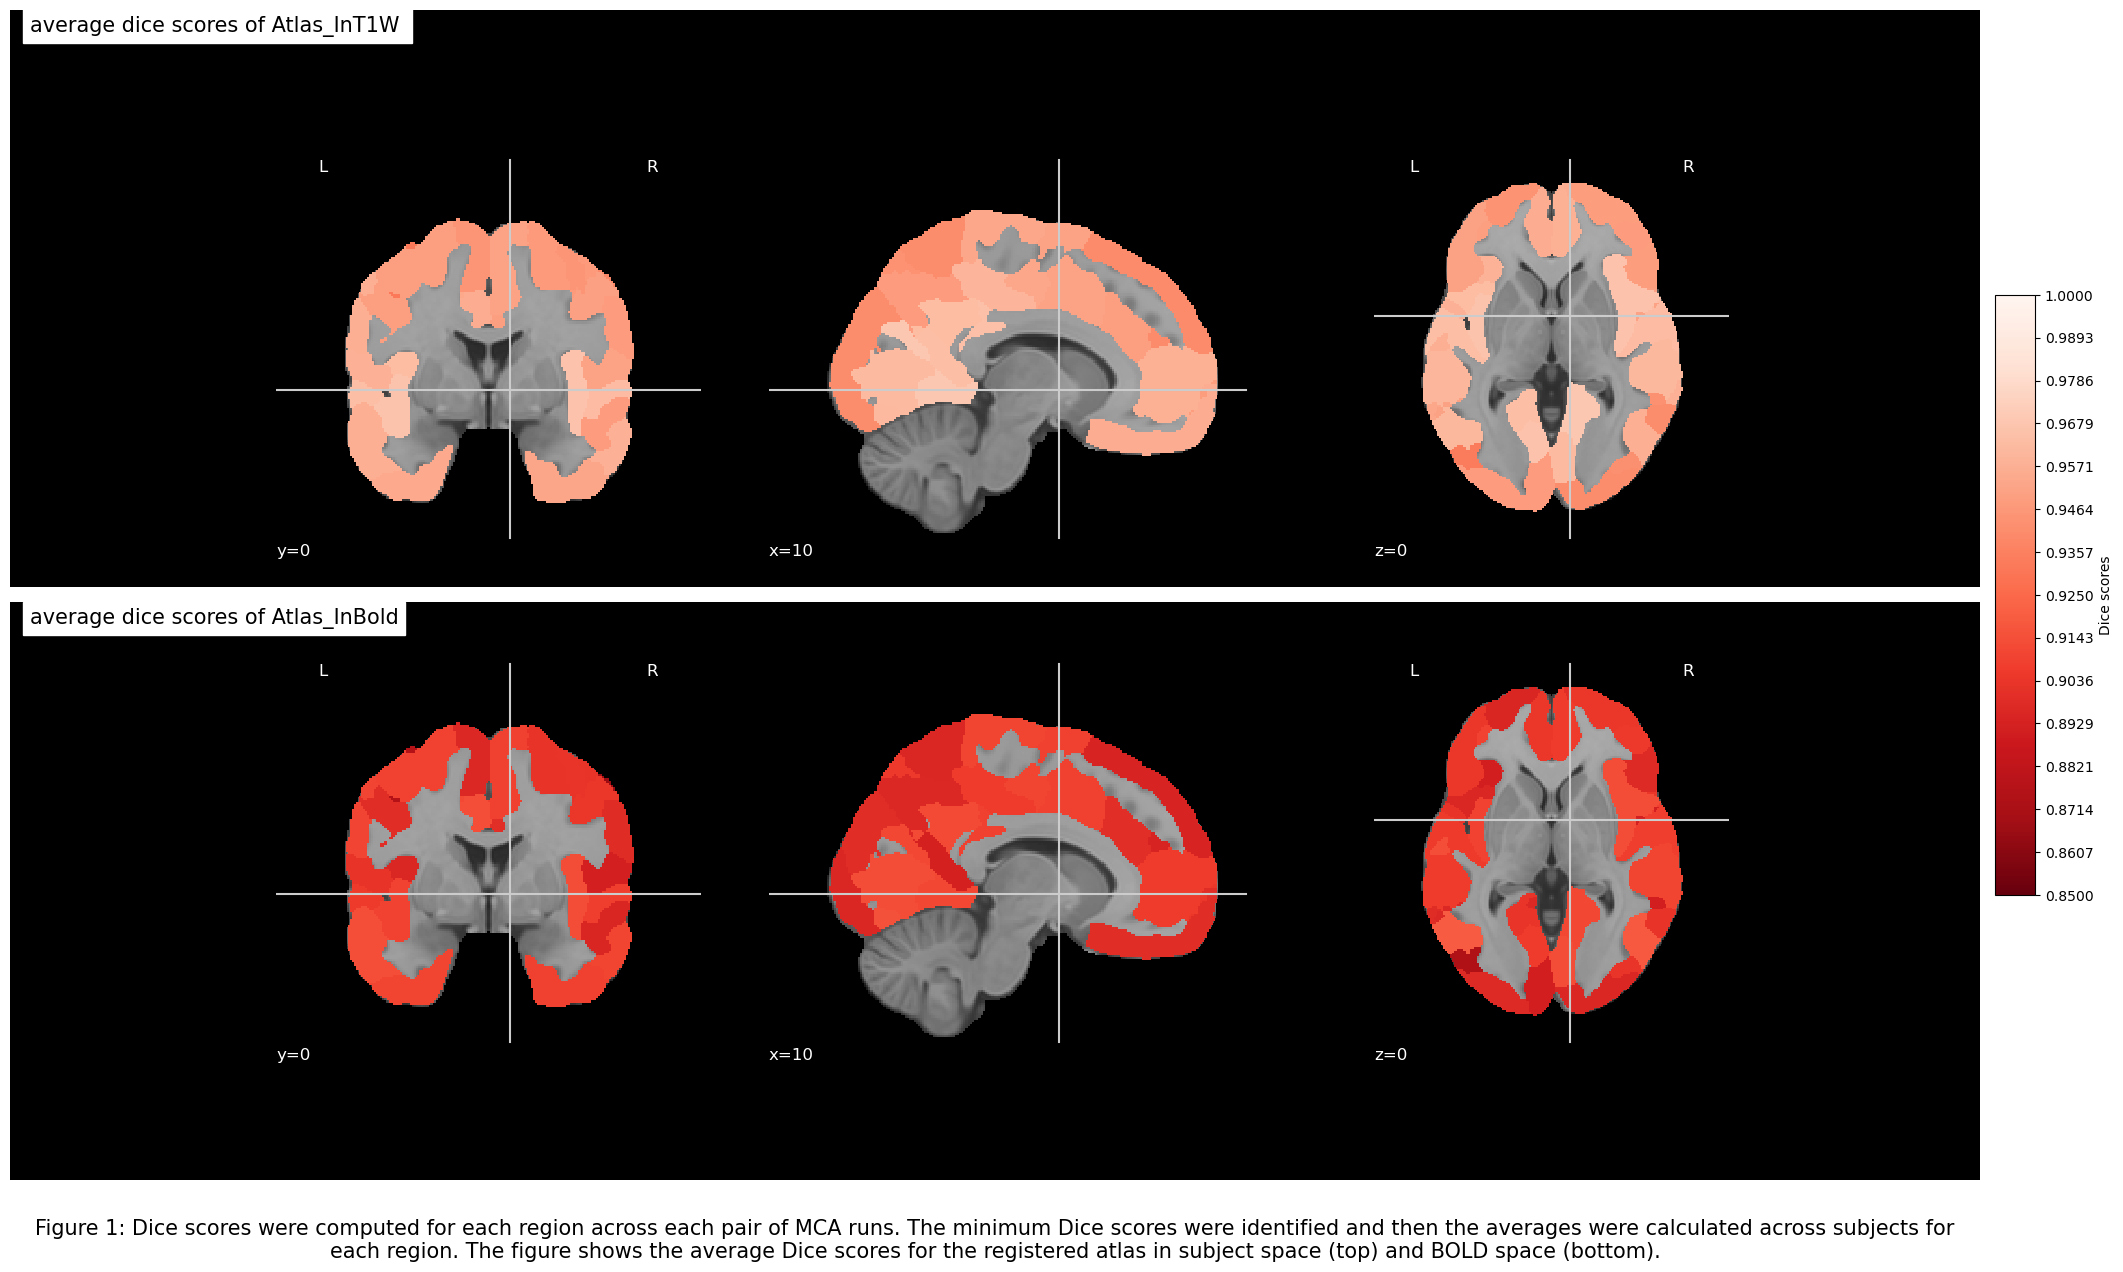

In [135]:
from nilearn import plotting, datasets
import matplotlib.pyplot as plt
import numpy as np
import textwrap


# Assuming you have two different metrics as images
metric_img1 = Return_Metric_Img(min_T1)
metric_img2 = Return_Metric_Img(min_bold)
# vmin = min(np.min(min_T1), np.min(min_bold))
vmin=0.85
vmax = max(np.max(min_T1), np.max(min_bold))

print(np.min(min_T1), np.min(min_bold), np.max(min_T1), np.max(min_bold))
# Create a subplot with two figures (1 row, 2 columns)
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# Set color range and colormap
vmax = 1
cmap = "Reds_r"

# Plot the first metric with an individual colorbar
plotting.plot_stat_map(
    metric_img1,
    bg_img=datasets.load_mni152_template(),
    display_mode='ortho',
    cut_coords=(10, 0, 0),
    title='average dice scores of Atlas_InT1W ',
    cmap=cmap,
    axes=axes[0],
    vmin=0.85, #np.min(min_T1),
    vmax=vmax,
    colorbar=False
)

# Plot the second metric with an individual colorbar
plotting.plot_stat_map(
    metric_img2,
    bg_img=datasets.load_mni152_template(),
    display_mode='ortho',
    cut_coords=(10, 0, 0),
    title='average dice scores of Atlas_InBold',
    cmap=cmap,
    axes=axes[1],
    vmin=0.85, #np.min(min_bold),
    vmax=vmax,
    colorbar=False
)
# Add a common colorbar for both plots with extended tick marks
cbar_ax = fig.add_axes([1, 0.25, 0.02, 0.5])
norm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Generate custom tick marks across the color range
ticks = np.linspace(vmin, vmax, 15)  # Adjust the number of ticks here for finer granularity
cbar = fig.colorbar(norm, cax=cbar_ax, label='Dice scores', ticks=ticks)
# Show the plots
plt.tight_layout()

# Define the text and wrap it to a specific width
text = ("Figure 1: Dice scores were computed for each region across each pair of MCA runs. The minimum Dice scores were identified and then the averages were calculated across subjects for each region. The figure shows the average Dice scores for the registered atlas in subject space (top) and BOLD space (bottom).")
wrapped_text = "\n".join(textwrap.wrap(text, width=180))  # Adjust the width as needed

# Add the wrapped text to the figure
plt.figtext(0.5, -0.05, wrapped_text, ha="center", fontsize=15,  wrap=True)
plt.show()


0.9647529918303113 0.9178039615560363 0.9909357746030691 0.9594568386710461


/tmp/ipykernel_11726/2919279531.py:58: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



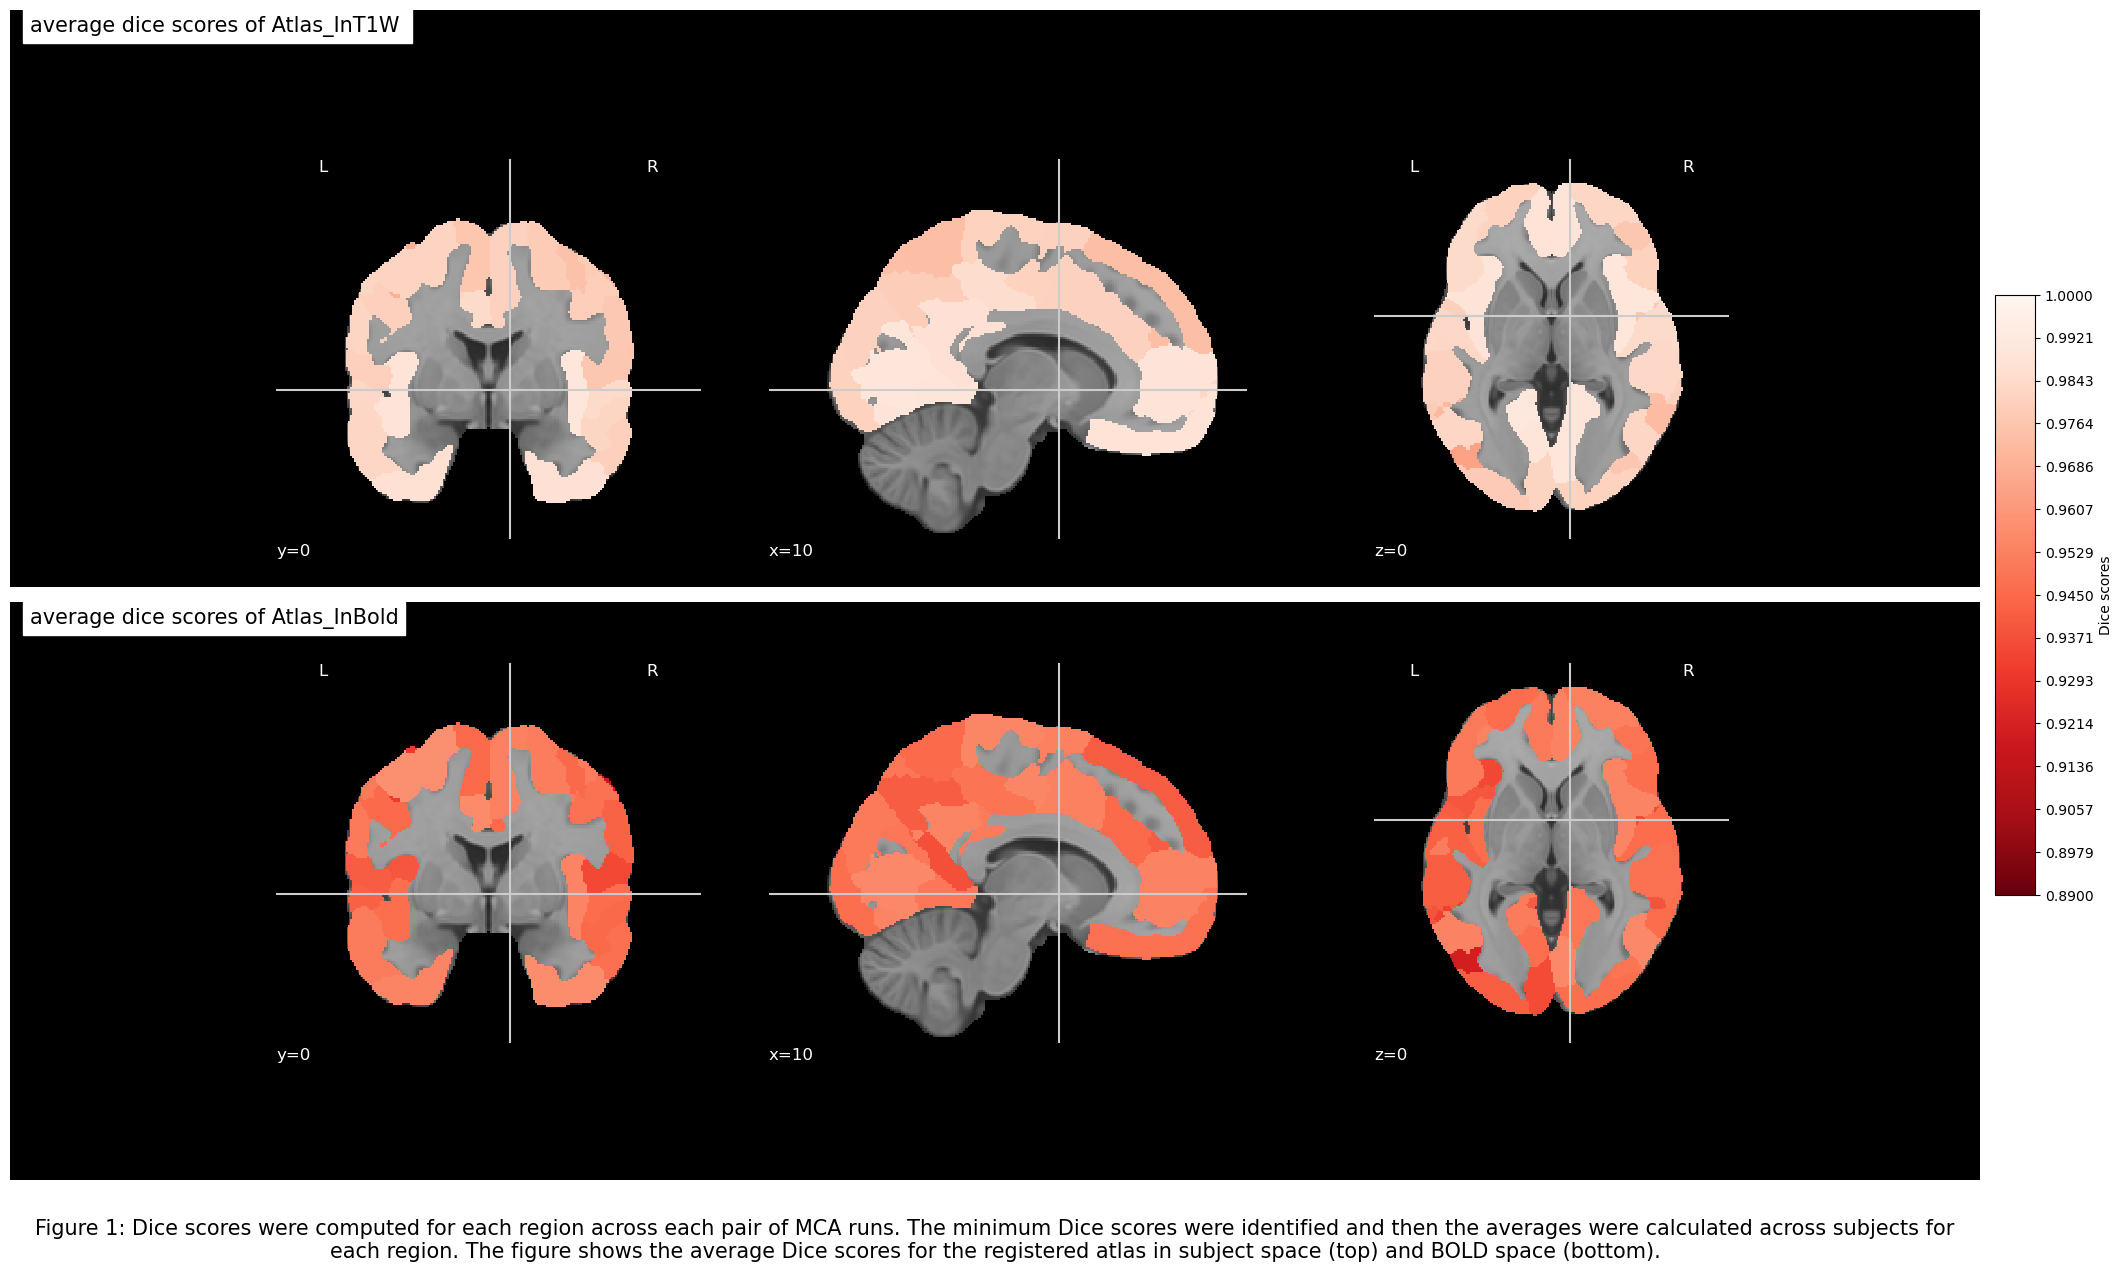

In [136]:
from nilearn import plotting, datasets
import matplotlib.pyplot as plt
import numpy as np
import textwrap


# Assuming you have two different metrics as images
metric_img1_filtered = Return_Metric_Img(min_T1_filtered)
metric_img2_filtered = Return_Metric_Img(min_bold_filtered)
# vmin = min(np.min(min_T1_filtered), np.min(min_bold_filtered))
# vmax = max(np.max(min_T1_filtered), np.max(min_bold_filtered))
# vmin = min(np.min(min_T1), np.min(min_bold))
vmin=0.89
vmax = max(np.max(min_T1), np.max(min_bold))
print(np.min(min_T1_filtered), np.min(min_bold_filtered), np.max(min_T1_filtered), np.max(min_bold_filtered))
# Create a subplot with two figures (1 row, 2 columns)
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# Set color range and colormap
vmax = 1
cmap = "Reds_r"

# Plot the first metric with an individual colorbar
plotting.plot_stat_map(
    metric_img1_filtered,
    bg_img=datasets.load_mni152_template(),
    display_mode='ortho',
    cut_coords=(10, 0, 0),
    title='average dice scores of Atlas_InT1W ',
    cmap=cmap,
    axes=axes[0],
    vmin=0.89, #np.min(min_T1),
    vmax=vmax,
    colorbar=False
)

# Plot the second metric with an individual colorbar
plotting.plot_stat_map(
    metric_img2_filtered,
    bg_img=datasets.load_mni152_template(),
    display_mode='ortho',
    cut_coords=(10, 0, 0),
    title='average dice scores of Atlas_InBold',
    cmap=cmap,
    axes=axes[1],
    vmin=0.89, #np.min(min_bold),
    vmax=vmax,
    colorbar=False
)
# Add a common colorbar for both plots with extended tick marks
cbar_ax = fig.add_axes([1, 0.25, 0.02, 0.5])
norm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Generate custom tick marks across the color range
ticks = np.linspace(vmin, vmax, 15)  # Adjust the number of ticks here for finer granularity
cbar = fig.colorbar(norm, cax=cbar_ax, label='Dice scores', ticks=ticks)
# Show the plots
plt.tight_layout()

# Define the text and wrap it to a specific width
text = ("Figure 1: Dice scores were computed for each region across each pair of MCA runs. The minimum Dice scores were identified and then the averages were calculated across subjects for each region. The figure shows the average Dice scores for the registered atlas in subject space (top) and BOLD space (bottom).")
wrapped_text = "\n".join(textwrap.wrap(text, width=180))  # Adjust the width as needed

# Add the wrapped text to the figure
plt.figtext(0.5, -0.05, wrapped_text, ha="center", fontsize=15,  wrap=True)
plt.show()


$$
Numerical Variability:  \forall r \in \left[ 1 \hspace{0.1cm}, R \right],  \hspace{0.5cm} 
\Delta_{r} = \text{mean}_{s \in \left[ 1 \hspace{0.1cm}, S \right]} \left( \min_{(p,p^{'}),(p^{''},p^{'''}) \in \left[ 1 \hspace{0.1cm}, P \right]} 
\hspace{0.2cm} D \left( V_{r,s,(p,p^{'})}, V_{r,s,(p^{''},p^{'''})} \right) \right)
\newline

\hspace{0.5cm}R:\text{Number of Regions}, \hspace{0.1cm} S: \text{Number of Subjects}, \hspace{0.2cm} \text{and} \hspace{0.2cm} P: \text{Number of MCA pairs}\,(p,p^{'})


$$

In [137]:
#Sorting based on region size
avrofMCApairs_T1=np.mean(stack_matrix_T1,axis=2)
avrofMCApairs_bold=np.mean(stack_matrix_bold,axis=2)
print(avrofMCApairs_T1.shape)

# Step 1: Get sorted region indices based on size
sorted_indices = region_size_df_sorted['Label'].index.values  # Get indices after sorting
sorted_region=region_size_df_sorted['Region'].values
print((sorted_region[0]))
# Step 2: Apply sorting to the columns of the matrices
sorted_avrofMCApairs_T1 = avrofMCApairs_T1[:, sorted_indices]  # Reorder columns
sorted_avrofMCApairs_bold = avrofMCApairs_bold[:, sorted_indices]  # Reorder columns



(112, 100)
7Networks_RH_Limbic_TempPole_1


In [157]:
(stack_matrix_bold[78,2,:])

array([0.76470588, 0.42196532, 0.10365854, 0.42011834, 0.43975904,
       0.44642857, 0.39393939, 0.43786982, 0.46107784, 0.56647399,
       0.18292683, 0.55621302, 0.59036145, 0.57738095, 0.55757576,
       0.56804734, 0.61676647, 0.31097561, 0.90532544, 0.92771084,
       0.89880952, 0.8969697 , 0.90532544, 0.86826347, 0.30769231,
       0.31325301, 0.23214286, 0.34545455, 0.26035503, 0.28742515,
       0.93975904, 0.82142857, 0.88484848, 0.81065089, 0.89221557,
       0.83333333, 0.9030303 , 0.81656805, 0.88622754, 0.80606061,
       0.92307692, 0.81437126, 0.82248521, 0.82634731, 0.80239521])

In [161]:
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np

# Determine shared color map limits
vmin = min(sorted_avrofMCApairs_T1.min(),sorted_avrofMCApairs_bold.min())
vmax = max(sorted_avrofMCApairs_T1.max(), sorted_avrofMCApairs_bold.max())
print(vmin,vmax)
# Convert index dictionaries to ordered lists of subject IDs
indexT_labels = [indexT[i] for i in range(len(indexT))]  # Extract subject IDs from indexT dictionary
indexB_labels = [indexB[i] for i in range(len(indexB))]  # Extract subject IDs from indexB dictionary
sorted_region=region_size_df_sorted['Region'].values

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=["T1", "Bold"])

# Add first heatmap
fig.add_trace(
    go.Heatmap(
        z=sorted_avrofMCApairs_T1,
        y=indexT_labels,  # Use extracted subject IDs for BOLD
        x=sorted_region,
        colorscale='rainbow_r',
        zmin=vmin,
        zmax=vmax,
        colorbar=dict(title="Average", len=0.8),
    ),
    row=1,
    col=1
)

# Add second heatmap (share the same color scale)
fig.add_trace(
    go.Heatmap(
        z=sorted_avrofMCApairs_bold,
        y=indexB_labels,  # Use extracted subject IDs for BOLD
        x=sorted_region,
        colorscale='rainbow_r',
        zmin=vmin,
        zmax=vmax,
        showscale=False,  # Hide extra colorbar
    ),
    row=1,
    col=2
)

# Update y-axis labels
fig.update_yaxes(title_text="Subject ID", row=1, col=1)
fig.update_yaxes(title_text="Subject ID", row=1, col=2)

# Update layout
fig.update_layout(
    height=1000, width=2000,
    title_text= "PD Heatmaps of average dice scores of MCApairs_T1 and average of MCApairs_bold across sorted region by size",
    coloraxis_colorbar=dict(len=0.8)
)

fig.show()


0.45030458010809804 1.0


In [70]:
##Remove 5 worse subjects

In [71]:
#Sorting after removing worse subjects based on region size
avrofMCApairs_T1_filtered=np.mean(stack_matrix_T1_filtered,axis=2)
avrofMCApairs_bold_filtered=np.mean(stack_matrix_bold_filtered,axis=2)

# Step 1: Get sorted region indices based on size
sorted_indices = region_size_df_sorted['Label'].index.values  # Get indices after sorting
sorted_region=region_size_df_sorted['Region'].values
print((sorted_region[1]))
# Step 2: Apply sorting to the columns of the matrices

sorted_avrofMCApairs_T1_filtered = avrofMCApairs_T1_filtered[:, sorted_indices]  # Reorder columns
sorted_avrofMCApairs_bold_filtered= avrofMCApairs_bold_filtered[:, sorted_indices]  # Reorder columns

# Now sorted_avrofMCApairs_T1 and sorted_avrofMCApairs_bold have regions sorted by increasing size


7Networks_LH_Default_PFC_5


In [72]:
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np

# Determine shared color map limits
vmin = min(sorted_avrofMCApairs_T1_filtered.min(), sorted_avrofMCApairs_bold_filtered.min())
vmax = max(sorted_avrofMCApairs_T1_filtered.max(), sorted_avrofMCApairs_bold_filtered.max())
# Convert index dictionaries to ordered lists of subject IDs
indexT_labels_filtered = [filtered_indexT[i] for i in filtered_indexT.keys()]  # Extract subject IDs from indexT dictionary
indexB_labels_filtered = [filtered_indexB[i] for i in filtered_indexB.keys()]  # Extract subject IDs from indexB dictionary
sorted_region=region_size_df_sorted['Region'].values

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=["T1", "Bold"])

# Add first heatmap
fig.add_trace(
    go.Heatmap(
        z=sorted_avrofMCApairs_T1_filtered,
        y=indexT_labels_filtered,
        x=sorted_region,
        colorscale='rainbow_r',
        zmin=vmin,
        zmax=vmax,
        colorbar=dict(title="rainbow_r", len=0.8),
    ),
    row=1,
    col=1
)

# Add second heatmap (share the same color scale)
fig.add_trace(
    go.Heatmap(
        z=sorted_avrofMCApairs_bold_filtered,
        y=indexB_labels_filtered,
        x=sorted_region,
        colorscale='rainbow_r',
        zmin=vmin,
        zmax=vmax,
        showscale=False,  # Hide extra colorbar
    ),
    row=1,
    col=2
)

# Update y-axis labels
fig.update_yaxes(title_text="Subject ID", row=1, col=1)
fig.update_yaxes(title_text="Subject ID", row=1, col=2)

# Update layout
fig.update_layout(
    height=1000, width=2000,
    title_text=" PD Heatmaps of average dice scores of MCApairs_T1 and average of MCApairs_bold across sorted region by size after removing 10 worse subjects from both T1 and Bold",
    coloraxis_colorbar=dict(len=0.8)
)

fig.show()



In [73]:
#Sorting based on region size and average across subjects values
import numpy as np

# Compute mean across subjects (axis=0)
mean_values = np.mean(sorted_avrofMCApairs_T1, axis=0)  
mean_valuesb = np.mean(sorted_avrofMCApairs_bold, axis=0)  

# Get sorted indices based on mean values
sortedavr_indices = np.argsort(mean_values).astype(int)  
sortedavr_indicesb = np.argsort(mean_valuesb).astype(int)  

# Convert region labels to NumPy array and reorder
sorted_region = np.array(region_size_df_sorted['Region'].values)  
sortedavr_region = sorted_region[sortedavr_indices]  
sortedavr_regionb = sorted_region[sortedavr_indices]  

# Reorder matrix columns (regions)
sortedavr_avrofMCApairs_T1= sorted_avrofMCApairs_T1[:, sortedavr_indices]
sortedavr_avrofMCApairs_bold_T1= sorted_avrofMCApairs_bold[:, sortedavr_indices]
sortedavr_avrofMCApairs_bold= sorted_avrofMCApairs_bold[:, sortedavr_indicesb]

# Compute mean across regions for each subject (axis=1)
Smean_values = np.mean(sortedavr_avrofMCApairs_T1, axis=1)  
Smean_valuesb = np.mean(sortedavr_avrofMCApairs_bold, axis=1)  

# Get sorted indices for subjects (convert to integer type)
Ssortedavr_indices = np.argsort(Smean_values).astype(int)  
Ssortedavr_indicesb = np.argsort(Smean_valuesb).astype(int)  

# Convert subject labels to NumPy array
indexT_labels= np.array([indexT[i] for i in indexT.keys()])  
indexB_labels= np.array([indexB[i] for i in indexB.keys()])  

# Reorder subject labels **(For reference, NOT for indexing)**
sorted_indexT_labels = indexT_labels[Ssortedavr_indices]  
sorted_indexB_labels= indexB_labels[Ssortedavr_indicesb]  

# sortedavr_stdofMCApairs_T1 = sortedavr_stdofMCApairs_T1[Ssortedavr_indices, :]  
# sortedavr_stdofMCApairs_bold= sortedavr_stdofMCApairs_bold[Ssortedavr_indices, :]  
sortedavr_avrofMCApairs_T1= sortedavr_avrofMCApairs_T1[Ssortedavr_indices, :]  
sortedavr_avrofMCApairs_bold_T1= sortedavr_avrofMCApairs_bold_T1[Ssortedavr_indices, :]  
sortedavr_avrofMCApairs_bold= sortedavr_avrofMCApairs_bold[Ssortedavr_indicesb, :]  



In [74]:
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np

# Determine shared color map limits
vmin = 0.85 # min(sortedavr_avrofMCApairs_T1.min(), sortedavr_avrofMCApairs_bold.min())
vmax = max(sortedavr_avrofMCApairs_T1.max(), sortedavr_avrofMCApairs_bold_T1.max())


# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=["T1", "Bold"])

# Add first heatmap
fig.add_trace(
    go.Heatmap(
        z=sortedavr_avrofMCApairs_T1,
        y=sorted_indexT_labels,
        x=sortedavr_region,
        colorscale='rainbow_r',
        zmin=vmin,
        zmax=vmax,
        colorbar=dict(title="rainbow_r", len=0.8),
    ),
    row=1,
    col=1
)

# Add second heatmap (share the same color scale)
fig.add_trace(
    go.Heatmap(
        z=sortedavr_avrofMCApairs_bold_T1,
        y=sorted_indexT_labels,
        x=sortedavr_region,
        colorscale='rainbow_r',
        zmin=vmin,
        zmax=vmax,
        showscale=False,  # Hide extra colorbar
    ),
    row=1,
    col=2
)

# Update y-axis labels
fig.update_yaxes(title_text="Subject ID", row=1, col=1)
fig.update_yaxes(title_text="Subject ID", row=1, col=2)

# Update layout
fig.update_layout(
    height=1000, width=2000,
    title_text="Heatmaps of the AVerage of MCA pairs_T1 and Average of MCApairs_bold sorted based on the average dice scores across subject and across regions of T1 ",
    coloraxis_colorbar=dict(len=0.8)
)

fig.show()



In [75]:
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np

# Determine shared color map limits
vmin = 0.85 # min(sortedavr_avrofMCApairs_T1.min(), sortedavr_avrofMCApairs_bold.min())
vmax = max(sortedavr_avrofMCApairs_T1.max(), sortedavr_avrofMCApairs_bold.max())


# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=["T1", "Bold"])

# Add first heatmap
fig.add_trace(
    go.Heatmap(
        z=sortedavr_avrofMCApairs_T1,
        y=sorted_indexT_labels,
        x=sortedavr_region,
        colorscale='rainbow_r',
        zmin=vmin,
        zmax=vmax,
        colorbar=dict(title="rainbow_r", len=0.8),
    ),
    row=1,
    col=1
)

# Add second heatmap (share the same color scale)
fig.add_trace(
    go.Heatmap(
        z=sortedavr_avrofMCApairs_bold,
        y=sorted_indexB_labels,
        x=sortedavr_regionb,
        colorscale='rainbow_r',
        zmin=vmin,
        zmax=vmax,
        showscale=False,  # Hide extra colorbar
    ),
    row=1,
    col=2
)

# Update y-axis labels
fig.update_yaxes(title_text="Subject ID", row=1, col=1)
fig.update_yaxes(title_text="Subject ID", row=1, col=2)

# Update layout
fig.update_layout(
    height=1000, width=2000,
    title_text="Heatmaps of the AVerage of MCA pairs_T1 and Average of MCApairs_bold sorted based on the average dice scores across subject and across regions of T1 and bold separatedly ",
    coloraxis_colorbar=dict(len=0.8)
)

fig.show()



In [76]:
import numpy as np

# Compute mean across subjects (axis=0)
mean_values = np.mean(sorted_avrofMCApairs_T1_filtered, axis=0)  
mean_valuesb = np.mean(sorted_avrofMCApairs_bold_filtered, axis=0)  

# Get sorted indices based on mean values
sortedavr_indices = np.argsort(mean_values).astype(int)  
sortedavr_indicesb = np.argsort(mean_valuesb).astype(int)  

# Convert region labels to NumPy array and reorder
sorted_region = np.array(region_size_df_sorted['Region'].values)  
sortedavr_region = sorted_region[sortedavr_indices]  
sortedavr_regionb = sorted_region[sortedavr_indicesb]  

# Reorder matrix columns (regions)

sortedavr_avrofMCApairs_T1_filtered = sorted_avrofMCApairs_T1_filtered[:, sortedavr_indices]
sortedavr_avrofMCApairs_bold_T1_filtered = sorted_avrofMCApairs_bold_filtered[:, sortedavr_indices]
sortedavr_avrofMCApairs_bold_filtered = sorted_avrofMCApairs_bold_filtered[:, sortedavr_indicesb]

# Compute mean across regions for each subject (axis=1)
Smean_values = np.mean(sortedavr_avrofMCApairs_T1_filtered, axis=1)  
Smean_valuesb = np.mean(sortedavr_avrofMCApairs_bold_filtered, axis=1)  

# Get sorted indices for subjects (convert to integer type)
Ssortedavr_indices = np.argsort(Smean_values).astype(int)  
Ssortedavr_indicesb = np.argsort(Smean_valuesb).astype(int)  

# Convert subject labels to NumPy array
indexT_labels_filtered = np.array([filtered_indexT[i] for i in filtered_indexT.keys()])  
indexB_labels_filtered = np.array([filtered_indexB[i] for i in filtered_indexB.keys()])  

# Reorder subject labels **(For reference, NOT for indexing)**
sorted_indexT_labels_filtered = indexT_labels_filtered[Ssortedavr_indices]  
sorted_indexB_labels_filtered = indexB_labels_filtered[Ssortedavr_indicesb]  


sortedavr_avrofMCApairs_T1_filtered = sortedavr_avrofMCApairs_T1_filtered[Ssortedavr_indices, :]  
sortedavr_avrofMCApairs_bold_T1_filtered = sortedavr_avrofMCApairs_bold_T1_filtered[Ssortedavr_indices, :]  
sortedavr_avrofMCApairs_bold_filtered = sortedavr_avrofMCApairs_bold_filtered[Ssortedavr_indicesb, :]  




In [77]:
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np

# Determine shared color map limits
vmin = 0.85 # min(sortedavr_avrofMCApairs_T1.min(), sortedavr_avrofMCApairs_bold.min())
vmax = max(sortedavr_avrofMCApairs_T1_filtered.max(), sortedavr_avrofMCApairs_bold_T1_filtered.max())


# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=["T1", "Bold"])

# Add first heatmap
fig.add_trace(
    go.Heatmap(
        z=sortedavr_avrofMCApairs_T1_filtered,
        y=sorted_indexT_labels_filtered,
        x=sortedavr_region,
        colorscale='rainbow_r',
        zmin=vmin,
        zmax=vmax,
        colorbar=dict(title="rainbow_r", len=0.8),
    ),
    row=1,
    col=1
)

# Add second heatmap (share the same color scale)
fig.add_trace(
    go.Heatmap(
        z=sortedavr_avrofMCApairs_bold_T1_filtered,
        y=sorted_indexT_labels_filtered,
        x=sortedavr_region,
        colorscale='rainbow_r',
        zmin=vmin,
        zmax=vmax,
        showscale=False,  # Hide extra colorbar
    ),
    row=1,
    col=2
)

# Update y-axis labels
fig.update_yaxes(title_text="Subject ID", row=1, col=1)
fig.update_yaxes(title_text="Subject ID", row=1, col=2)

# Update layout
fig.update_layout(
    height=1000, width=2000,
    title_text="Heatmaps of the AVerage of MCA pairs_T1 and Average of MCApairs_bold sorted based on the average dice scores across subject and across regions of T1 ",
    coloraxis_colorbar=dict(len=0.8)
)

fig.show()



In [78]:
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np

# Determine shared color map limits
vmin = 0.85 #min(sortedavr_avrofMCApairs_T1_filtered.min(), sortedavr_avrofMCApairs_bold_filtered.min())
vmax = max(sortedavr_avrofMCApairs_T1_filtered.max(), sortedavr_avrofMCApairs_bold_filtered.max())


# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=["T1", "Bold"])

# Add first heatmap
fig.add_trace(
    go.Heatmap(
        z=sortedavr_avrofMCApairs_T1_filtered,
        y=sorted_indexT_labels_filtered,
        x=sortedavr_region,
        colorscale='rainbow_r',
        zmin=vmin,
        zmax=vmax,
        colorbar=dict(title="Average", len=0.8),
    ),
    row=1,
    col=1
)

# Add second heatmap (share the same color scale)
fig.add_trace(
    go.Heatmap(
        z=sortedavr_avrofMCApairs_bold_filtered,
        y=sorted_indexB_labels_filtered,
        x=sortedavr_regionb,
        colorscale='rainbow_r',
        zmin=vmin,
        zmax=vmax,
        showscale=False,  # Hide extra colorbar
    ),
    row=1,
    col=2
)

# Update y-axis labels
fig.update_yaxes(title_text="Subject ID", row=1, col=1)
fig.update_yaxes(title_text="Subject ID", row=1, col=2)

# Update layout
fig.update_layout(
    height=1000, width=2000,
    title_text="Heatmaps of the AVerage of MCA pairs_T1 and Average of MCApairs_bold sorted based on the average dice scores across subject and across regions of T1 and bold separatedly",
    coloraxis_colorbar=dict(len=0.8)
)

fig.show()



In [79]:
stack_matrix_T11=create_stackmatrix_OfDice(result_df_atlasinT1W1)
stack_matrix_bold1=create_stackmatrix_OfDice(result_df_ROI_atlasinT1W2Bold1)

Numerical_min_T11=  np.min(stack_matrix_T11,axis=2)
numerical_min_bold1=np.min(stack_matrix_bold1,axis=2)
min_T11=np.mean(Numerical_min_T11,axis=0)
min_bold1=np.mean(numerical_min_bold1,axis=0)

NameError: name 'result_df_atlasinT1W1' is not defined

<!-- $$
Numerical Variability:  \forall r \in \left[ 1 \hspace{0.1cm}, R \right],  \hspace{0.5cm} 
\Delta_{r} = \text{mean}_{s \in \left[ 1 \hspace{0.1cm}, S \right]} \left( \min_{(p,p^{'}),(p^{''},p^{'''}) \in \left[ 1 \hspace{0.1cm}, P \right]} 
\hspace{0.2cm} D \left( V_{r,s,(p,p^{'})}, V_{r,s,(p^{''},p^{'''})} \right) \right)
\newline
Anatomical Variability:  \forall r \in \left[ 1 \hspace{0.1cm}, R \right], \hspace{0.5cm} \Delta^{'}_{r} = \text{mean}_{(p,p^{'}) \in \left[ 1 \hspace{0.1cm}, P \right]} \left( \min_{(s,s^{'}) \in \left[ 1 \hspace{0.1cm}, S \right]} 
\hspace{0.2cm} D \left( V_{r,s,(p,p^{'})}, V_{r,s^{'},(p,p^{'})} \right) \right)\\
\newline
\hspace{0.5cm}R:\text{Number of Regions}, \hspace{0.1cm} S: \text{Number of Subjects}, \hspace{0.2cm} \text{and} \hspace{0.2cm} P: \text{Number of MCA pairs}\,(p,p^{'})


$$ -->